# System preparation

## Import libraries

In [ ]:
#pip install catboost

     |████████████████████████████████| 76.1 MB 49 kB/s 


In [42]:
# Graphics
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
from matplotlib.ticker import StrMethodFormatter

# Data 
import numpy as np
import pandas as pd

#Regular expressions
import re as re

# Utilities
from time import time

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import scale


from sklearn import model_selection
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.pipeline import Pipeline

# Metrics
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer

#Regression
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae, explained_variance_score as evs


# Gradient Boosting models
from catboost import CatBoostRegressor


# Others
import warnings
from functools import reduce
from pathlib import Path
import os

#Power Transformer
from sklearn.preprocessing import PowerTransformer

#Regression models
from functions.regression_models import run_cv_reg
from functions.regression_models import run_cv_algorithm


In [3]:
# Configurations.
%matplotlib inline
sns.set_style("darkgrid")
warnings.filterwarnings("ignore")
plt.rc("font", family="serif", size=15)

# Regression

## Load data



Read the csv with the feature engineering applied before to the raw data.

In [4]:
compressors_all_data = pd.read_csv("data/compressors_all_data_best_features_2days.csv", error_bad_lines=False, index_col=0)

In [5]:
#Make sure the datetime format is correct
compressors_all_data["datetime"] = pd.to_datetime(compressors_all_data["datetime"], format="%Y-%m-%d %H:%M:%S")

In [6]:
compressors_all_data.head()

compressorID            datetime  cycle  current_mean_3h  rpm_mean_3h  \
0             1 2015-01-01 09:00:00      1       170.028993   449.533798   
1             1 2015-01-01 12:00:00      2       164.192565   403.949857   
2             1 2015-01-01 15:00:00      3       168.134445   435.781707   
3             1 2015-01-01 18:00:00      4       165.514453   430.472823   
4             1 2015-01-01 21:00:00      5       168.809347   437.111120   

   pressure_mean_3h  vibration_mean_3h  current_mean_lag_24h  \
0         94.592122          40.893502                   NaN   
1        105.687417          34.255891                   NaN   
2        107.793709          41.239405                   NaN   
3        101.703289          40.373739                   NaN   
4         90.911060          41.738542                   NaN   

   rpm_mean_lag_24h  pressure_mean_lag_24h  ...    s-8760    c-8760  \
0               NaN                    NaN  ...  0.000000  1.000000   
1               NaN                    NaN  ...  0.002152  0.999998   
2               NaN                    NaN  ...  0.004304  0.999991   
3               NaN                    NaN  ...  0.006455  0.999979   
4               NaN                    NaN  ...  0.008607  0.999963   

   comp1_fail  comp2_fail  comp3_fail  comp4_fail  rul_comp1  rul_comp2  \
0         0.0         0.0         0.0         0.0     63.875    108.875   
1         0.0         0.0         0.0         0.0     63.750    108.750   
2         0.0         0.0         0.0         0.0     63.625    108.625   
3         0.0         0.0         0.0         0.0     63.500    108.500   
4         0.0         0.0         0.0         0.0     63.375    108.375   

   rul_comp3  rul_comp4  
0        NaN      3.875  
1        NaN      3.750  
2        NaN      3.625  
3        NaN      3.500  
4        NaN      3.375  

[5 rows x 51 columns]

In [7]:
compressors_all_data[compressors_all_data['compressorID']==1]

compressorID            datetime  cycle  current_mean_3h  rpm_mean_3h  \
0                1 2015-01-01 09:00:00      1       170.028993   449.533798   
1                1 2015-01-01 12:00:00      2       164.192565   403.949857   
2                1 2015-01-01 15:00:00      3       168.134445   435.781707   
3                1 2015-01-01 18:00:00      4       165.514453   430.472823   
4                1 2015-01-01 21:00:00      5       168.809347   437.111120   
...            ...                 ...    ...              ...          ...   
2916             1 2015-12-31 21:00:00   2917       173.823921   411.557599   
2917             1 2016-01-01 00:00:00   2918       159.011758   494.917558   
2918             1 2016-01-01 03:00:00   2919       161.803419   433.438436   
2919             1 2016-01-01 06:00:00   2920       177.076824   425.010191   
2920             1 2016-01-01 09:00:00   2921       191.873171   382.736626   

      pressure_mean_3h  vibration_mean_3h  current_mean_lag_24h  \
0            94.592122          40.893502                   NaN   
1           105.687417          34.255891                   NaN   
2           107.793709          41.239405                   NaN   
3           101.703289          40.373739                   NaN   
4            90.911060          41.738542                   NaN   
...                ...                ...                   ...   
2916        106.767141          38.142952            172.822560   
2917         90.697539          39.491593            170.418891   
2918         90.529167          44.462013            168.588410   
2919         97.915512          40.671583            168.929720   
2920        100.893691          37.940220            170.444476   

      rpm_mean_lag_24h  pressure_mean_lag_24h  ...        s-8760    c-8760  \
0                  NaN                    NaN  ...  0.000000e+00  1.000000   
1                  NaN                    NaN  ...  2.151774e-03  0.999998   
2                  NaN                    NaN  ...  4.303538e-03  0.999991   
3                  NaN                    NaN  ...  6.455283e-03  0.999979   
4                  NaN                    NaN  ...  8.606997e-03  0.999963   
...                ...                    ...  ...           ...       ...   
2916        450.197402              99.205879  ... -8.606997e-03  0.999963   
2917        443.956751              98.912542  ... -6.455283e-03  0.999979   
2918        450.321357              98.073690  ... -4.303538e-03  0.999991   
2919        449.718252              97.372364  ... -2.151774e-03  0.999998   
2920        447.836922              97.137329  ...  6.432491e-16  1.000000   

      comp1_fail  comp2_fail  comp3_fail  comp4_fail  rul_comp1  rul_comp2  \
0            0.0         0.0         0.0         0.0     63.875    108.875   
1            0.0         0.0         0.0         0.0     63.750    108.750   
2            0.0         0.0         0.0         0.0     63.625    108.625   
3            0.0         0.0         0.0         0.0     63.500    108.500   
4            0.0         0.0         0.0         0.0     63.375    108.375   
...          ...         ...         ...         ...        ...        ...   
2916         0.0         0.0         0.0         0.0        NaN        NaN   
2917         0.0         0.0         0.0         0.0        NaN        NaN   
2918         0.0         0.0         0.0         0.0        NaN        NaN   
2919         0.0         0.0         0.0         0.0        NaN        NaN   
2920         0.0         0.0         0.0         0.0        NaN        NaN   

      rul_comp3  rul_comp4  
0           NaN      3.875  
1           NaN      3.750  
2           NaN      3.625  
3           NaN      3.500  
4           NaN      3.375  
...         ...        ...  
2916        NaN        NaN  
2917        NaN        NaN  
2918        NaN        NaN  
2919        NaN        NaN  
2920        NaN        NaN  

[2921 rows x 51 columns]

Create lists with the names of the columns for different data:
- Sensors: telemetry information
- Errors: compressor errors and counts
- Maintenance: time since last maintenance
- Model
- Compressor information: Age
- Failures: failures in the different components

In [8]:
print(compressors_all_data.shape)


(292100, 51)


In [9]:
print(compressors_all_data.isnull().any())

compressorID              False
datetime                  False
cycle                     False
current_mean_3h           False
rpm_mean_3h               False
pressure_mean_3h          False
vibration_mean_3h         False
current_mean_lag_24h       True
rpm_mean_lag_24h           True
pressure_mean_lag_24h      True
vibration_mean_lag_24h     True
current_max_lag_24h        True
rpm_max_lag_24h            True
pressure_max_lag_24h       True
vibration_max_lag_24h      True
current_min_lag_24h        True
rpm_min_lag_24h            True
pressure_min_lag_24h       True
vibration_min_lag_24h      True
error1                    False
error2                    False
error3                    False
error4                    False
error5                    False
error1count               False
error2count               False
error3count               False
error4count               False
error5count               False
comp1_maint               False
comp2_maint               False
comp3_ma

In [10]:
print(compressors_all_data.dtypes)

compressorID                       int64
datetime                  datetime64[ns]
cycle                              int64
current_mean_3h                  float64
rpm_mean_3h                      float64
pressure_mean_3h                 float64
vibration_mean_3h                float64
current_mean_lag_24h             float64
rpm_mean_lag_24h                 float64
pressure_mean_lag_24h            float64
vibration_mean_lag_24h           float64
current_max_lag_24h              float64
rpm_max_lag_24h                  float64
pressure_max_lag_24h             float64
vibration_max_lag_24h            float64
current_min_lag_24h              float64
rpm_min_lag_24h                  float64
pressure_min_lag_24h             float64
vibration_min_lag_24h            float64
error1                           float64
error2                           float64
error3                           float64
error4                           float64
error5                           float64
error1count     

In [11]:
compressors_all_data.error1 = compressors_all_data.error1.astype(int)
compressors_all_data.error2 = compressors_all_data.error2.astype(int)
compressors_all_data.error3 = compressors_all_data.error3.astype(int)
compressors_all_data.error4 = compressors_all_data.error4.astype(int)
compressors_all_data.error5 = compressors_all_data.error5.astype(int)

In [12]:
compressors_all_data.error1count = compressors_all_data.error1count.astype(int)
compressors_all_data.error2count = compressors_all_data.error2count.astype(int)
compressors_all_data.error3count = compressors_all_data.error3count.astype(int)
compressors_all_data.error4count = compressors_all_data.error4count.astype(int)
compressors_all_data.error5count = compressors_all_data.error5count.astype(int)


## Features selection

Feature selection is the process of reducing the number of input variables when developing a predictive model. It is desirable to reduce the number of input variables to both reduce the computational cost of modeling and, in some cases, to improve the performance of the model.

In [13]:
cols_failures_dum = [col for col in compressors_all_data.columns if 'fail' in col]

In [14]:
cols_rul = [col for col in compressors_all_data.columns if 'rul' in col]

In [15]:
cols_seasonality = [col for col in compressors_all_data.columns if (('s-' in col) | ('c-' in col))]

In [16]:
target = cols_rul
target

['rul_comp1', 'rul_comp2', 'rul_comp3', 'rul_comp4']

Drop everything but failures, rul and datetime

In [17]:
predictors = list(compressors_all_data.columns)
predictors = [ele for ele in predictors if ele not in (cols_rul + cols_failures_dum + ['datetime']) ]

## Create datasets

In [18]:
# Drop NA in the predictors
compressors_all_data_rul = compressors_all_data[predictors].dropna().merge(compressors_all_data[target].loc[list(compressors_all_data[predictors].dropna().index)], left_index=True, right_index=True)

X = compressors_all_data_rul[predictors]
y= compressors_all_data_rul[target]

## Apply Column Transformations

Dorp NaN for the X values

In [19]:
X.dropna(inplace=True)

In [20]:
y= y.loc[list(X.index)]

In [21]:
X.reset_index(drop=True,inplace=True)
y.reset_index(drop=True, inplace=True)

### Save PowerTransform

In [22]:
yj = PowerTransformer(method='yeo-johnson')

In [23]:
yj = yj.fit(X)

In [24]:
from pickle import dump

In [25]:
# save the scaler
dump(yj, open('yj.pkl', 'wb'))

### Transform Yeo-Johnson

In [26]:
# transform the training dataset
X_yj = yj.transform(X)

In [27]:
X_yj = pd.DataFrame(X_yj, columns=X.columns)


In [28]:
X = X_yj

## Split by component

In [29]:
# All the data

y_list = []
X_list = []

for rul_comp in y.columns:
  exec('y_{} = pd.DataFrame()'.format(rul_comp))
  exec('y_{} = y[rul_comp]'.format(rul_comp))
  exec('y_{}.dropna(inplace=True)'.format(rul_comp))
  exec('temp= X.loc[list(y_{}.index)]'.format(rul_comp))
  exec('X_{}= temp'.format(rul_comp))
  exec('y_list.append(str("y_{}"))'.format(rul_comp))
  exec('X_list.append(str("X_{}"))'.format(rul_comp))

## Split into Test and Train

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(233120, 42) (58280, 42) (233120, 4) (58280, 4)


**Missing data**

It's nedeed to get rid of the missing data, to be able to run the algorithms.

- As first approach drop NaN values

In [31]:
for rul_comp in cols_rul:
  # For the training set
  exec('y_train_{} = pd.DataFrame()'.format(rul_comp))
  exec('y_train_{} = y_train[rul_comp]'.format(rul_comp))
  exec('y_train_{}.dropna(inplace=True)'.format(rul_comp))
  exec('temp= X_train.loc[list(y_train_{}.index)]'.format(rul_comp))
  exec('X_train_{}= temp'.format(rul_comp))

  #For the testing set
  exec('y_test_{} = pd.DataFrame()'.format(rul_comp))
  exec('y_test_{} = y_test[rul_comp]'.format(rul_comp))
  exec('y_test_{}.dropna(inplace=True)'.format(rul_comp))
  exec('temp= X_test.loc[list(y_test_{}.index)]'.format(rul_comp))
  exec('X_test_{}= temp'.format(rul_comp))

# Best hyperparameters CB

### MVP CB

In [32]:
cb_model = CatBoostRegressor(verbose=False)

In [43]:
def eval_reg(y_test, predictions):
  '''
  Function:
  Evaluates a regression model through its main metrics
  '''
  print("### MEASURES OF REGRESSION MODEL ###")
  print("------------------------------------\n")

  print("R2 = {0:.4f}\n".format(r2_score(y_test, predictions))) # R2
  print("RMSE = {0:.4f}\n".format(mse(y_test, predictions, squared=False))) # Root Mean Squared Error
  print("MSE = {0:.4f}\n".format(mse(y_test, predictions, squared=True))) # Mean Squared Error

  if len(predictions[predictions<0])>0:
    print("MSLE not possible to be applied. Predicitons contain negative values.\n")
  else:
    print("MSLE = {0:.4f}\n".format(msle(y_test, predictions))) # Mean Squared Log Error

  print("MAE = {0:.4f}\n".format(mae(y_test, predictions))) # Mean Absolute Error
  print("EVS = {0:.4%}\n".format(evs(y_test, predictions))) # Explained Variance Score

In [44]:
for rul_comp in cols_rul:
  
  
  print("Start---> " + rul_comp)
  start_time = time()

  exec('y_temp_train = y_train_{}'.format(rul_comp))
  exec('X_temp_train = X_train_{}'.format(rul_comp))
  exec('y_temp_test = y_test_{}'.format(rul_comp))
  exec('X_temp_test = X_test_{}'.format(rul_comp))

  cb_model.fit(X_temp_train, y_temp_train)


  print("complete---> " + rul_comp)

  rdm_time = time() - start_time
  print(rdm_time)

  predictions = cb_model.predict(X_temp_test)
  eval_reg(y_temp_test, predictions) 

Start---> rul_comp1
complete---> rul_comp1
25.92848801612854
### MEASURES OF REGRESSION MODEL ###
------------------------------------

R2 = 0.9933

RMSE = 5.5478

MSE = 30.7779

MSLE not possible to be applied. Predicitons contain negative values.

MAE = 3.9658

EVS = 99.3275%

Start---> rul_comp2
complete---> rul_comp2
25.020922899246216
### MEASURES OF REGRESSION MODEL ###
------------------------------------

R2 = 0.9852

RMSE = 7.9579

MSE = 63.3281

MSLE not possible to be applied. Predicitons contain negative values.

MAE = 5.6670

EVS = 98.5201%

Start---> rul_comp3
complete---> rul_comp3
17.079310178756714
### MEASURES OF REGRESSION MODEL ###
------------------------------------

R2 = 0.9949

RMSE = 2.8154

MSE = 7.9264

MSLE not possible to be applied. Predicitons contain negative values.

MAE = 1.9202

EVS = 99.4919%

Start---> rul_comp4
complete---> rul_comp4
12.130714893341064
### MEASURES OF REGRESSION MODEL ###
------------------------------------

R2 = 0.9936

RMSE = 3.

### Random search method

Optimizing Hyperparameters with Grid & Random Search
I found this Towards Data Science article really useful to build the search methods and find the best hyperparameters. First let's define the parameters of each search:

- model
- space
- cv
- scoring

These are the CatBoost Regressor hyperparameters that will be used:

- iterations => The maximum number of trees that can be built when solving machine learning problems.
- learning_rate => Learning rate used for reducing the gradient step.
- depth => Depth of the tree. It can be set to any integer up to 16.
- l2_leaf_reg => Coefficient at the L2 regularization term of the cost function. Any positive value is allowed.

Their impact to the model is better explained in this hyperparameter tuning article dedicated to CB. You can find the rest of parameters for this algorithm at this link.

In [45]:
# define model
cb = CatBoostRegressor(verbose=False)

# define search space
param_grid = dict()
param_grid['iterations'] = [30, 50, 100]
param_grid['learning_rate'] = [0.02, 0.05, 0.1]
param_grid['depth'] = [2, 4, 8]
param_grid['l2_leaf_reg'] = [0.2, 0.5 ,1]

# define evaluation
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=7)

In [46]:
# define scoring
scoring='r2'

# define RandomSearchCV
search_rdm = RandomizedSearchCV(estimator=cb,
                                param_distributions=param_grid,
                                n_iter=5,
                                cv=cv,          
                                scoring=scoring,
                                return_train_score=True,
                                n_jobs=-1,
                                random_state=7)

In [47]:
for rul_comp in cols_rul:
  
  
  print("Start---> " + rul_comp)
  start_time = time()

  exec('y_temp = y_{}'.format(rul_comp))
  exec('X_temp = X_{}'.format(rul_comp))

  result_rdm = search_rdm.fit(X_temp, y_temp)

  print("complete---> " + rul_comp)

  rdm_time = time() - start_time
  print(rdm_time)

  # summarize result
  print('Best Score: {}'.format(result_rdm.best_score_))
  print('Best Hyperparameters: {}'.format(result_rdm.best_params_))
  print('Time consumed on the Seach: {}'.format(rdm_time))

Start---> rul_comp1
complete---> rul_comp1
45.90335726737976
Best Score: 0.7141009565739014
Best Hyperparameters: {'learning_rate': 0.1, 'l2_leaf_reg': 1, 'iterations': 30, 'depth': 8}
Time consumed on the Seach: 45.90335726737976
Start---> rul_comp2
complete---> rul_comp2
88.81977701187134
Best Score: 0.5953443551627172
Best Hyperparameters: {'learning_rate': 0.1, 'l2_leaf_reg': 1, 'iterations': 30, 'depth': 8}
Time consumed on the Seach: 88.81977701187134
Start---> rul_comp3
complete---> rul_comp3
49.44278311729431
Best Score: 0.7966138360312857
Best Hyperparameters: {'learning_rate': 0.1, 'l2_leaf_reg': 1, 'iterations': 30, 'depth': 8}
Time consumed on the Seach: 49.44278311729431
Start---> rul_comp4
complete---> rul_comp4
35.84152603149414
Best Score: 0.7718706104629679
Best Hyperparameters: {'learning_rate': 0.1, 'l2_leaf_reg': 1, 'iterations': 30, 'depth': 8}
Time consumed on the Seach: 35.84152603149414


### Grid Search method


Random Search method is used to reduce the range of values for each hyperparameter. Therefore, we can specify now the best configurations found to be adjusted in a Grid Search. However, we saw that the normal configuration of the model had a better performance. This is why we will continue with the normal configuration of the model. To apply this method, I will use CatBoost built-in function: grid_search



In [59]:
for rul_comp in cols_rul:
  
  print("Start---> " + rul_comp)

  # define model
  cb = CatBoostRegressor(iterations=1000, eval_metric='R2', verbose=False)

  # Using the built-in grid_search function
  grid = {'learning_rate': [0.05, 0.1, 0.12, 0.16],
          'depth': [4, 8 , 10],
          'l2_leaf_reg': [0.2, 1 , 4]
        }

  start_time = time()

  exec('y_temp = y_{}'.format(rul_comp))
  exec('X_temp = X_{}'.format(rul_comp))

  search_grd = cb.grid_search(grid,
                              X=X_temp,
                              y=y_temp, 
                              verbose=False,
                              plot=True)
  
  print("Finished---> " + rul_comp)

  # Best found parameters
  print(search_grd['params'])

  print(pd.DataFrame(search_grd['cv_results']))


Start---> rul_comp1


Custom logger is already specified. Specify more than one logger at same time is not thread safe.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.9049978751
bestIteration = 999


bestTest = 0.9646507168
bestIteration = 999


bestTest = 0.9730206052
bestIteration = 999


bestTest = 0.9811555246
bestIteration = 999


bestTest = 0.9059916387
bestIteration = 999


bestTest = 0.9650182551
bestIteration = 999


bestTest = 0.9727185759
bestIteration = 999


bestTest = 0.9811964
bestIteration = 999


bestTest = 0.9042871996
bestIteration = 999


bestTest = 0.9634245416
bestIteration = 999


bestTest = 0.9722664136
bestIteration = 999


bestTest = 0.9816365541
bestIteration = 999


bestTest = 0.9967615785
bestIteration = 999


bestTest = 0.9983668235
bestIteration = 999


bestTest = 0.9985326184
bestIteration = 999


bestTest = 0.9985470247
bestIteration = 999


bestTest = 0.9967308104
bestIteration = 999


bestTest = 0.9983223304
bestIteration = 999


bestTest = 0.9985069859
bestIteration = 999


bestTest = 0.9984351074
bestIteration = 999


bestTest = 0.9964532704
bestIteration = 999


bestTest = 0.9981358477
bestIteratio

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.8589469213
bestIteration = 999


bestTest = 0.9306003171
bestIteration = 999


bestTest = 0.9456651949
bestIteration = 999


bestTest = 0.9607184688
bestIteration = 999


bestTest = 0.8569902755
bestIteration = 999


bestTest = 0.9317521216
bestIteration = 999


bestTest = 0.946440399
bestIteration = 999


bestTest = 0.9627861863
bestIteration = 999


bestTest = 0.8598016471
bestIteration = 999


bestTest = 0.9315770177
bestIteration = 999


bestTest = 0.9417822208
bestIteration = 999


bestTest = 0.9618208705
bestIteration = 999


bestTest = 0.9914077465
bestIteration = 999


bestTest = 0.9969156817
bestIteration = 999


bestTest = 0.997351827
bestIteration = 999


bestTest = 0.9976749365
bestIteration = 999


bestTest = 0.9910208626
bestIteration = 999


bestTest = 0.9968461036
bestIteration = 998


bestTest = 0.9973715544
bestIteration = 999


bestTest = 0.997675385
bestIteration = 999


bestTest = 0.9904782553
bestIteration = 999


bestTest = 0.9967174407
bestIteratio

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.9389110281
bestIteration = 999


bestTest = 0.9775805496
bestIteration = 999


bestTest = 0.9817614986
bestIteration = 999


bestTest = 0.9883353365
bestIteration = 999


bestTest = 0.9364916952
bestIteration = 999


bestTest = 0.974773939
bestIteration = 999


bestTest = 0.9818720664
bestIteration = 999


bestTest = 0.9881025269
bestIteration = 998


bestTest = 0.9380678551
bestIteration = 999


bestTest = 0.9765127205
bestIteration = 999


bestTest = 0.9808240574
bestIteration = 999


bestTest = 0.9879465066
bestIteration = 999


bestTest = 0.9977098939
bestIteration = 999


bestTest = 0.99826224
bestIteration = 999


bestTest = 0.9982839199
bestIteration = 999


bestTest = 0.9983227248
bestIteration = 999


bestTest = 0.9975913028
bestIteration = 999


bestTest = 0.9983410804
bestIteration = 999


bestTest = 0.9982705313
bestIteration = 999


bestTest = 0.9984101128
bestIteration = 999


bestTest = 0.9974212989
bestIteration = 999


bestTest = 0.9981574104
bestIteratio

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.9223093877
bestIteration = 999


bestTest = 0.9677947042
bestIteration = 999


bestTest = 0.9734325378
bestIteration = 999


bestTest = 0.9833998502
bestIteration = 999


bestTest = 0.9179739142
bestIteration = 999


bestTest = 0.9666622274
bestIteration = 999


bestTest = 0.9738253952
bestIteration = 999


bestTest = 0.9826918893
bestIteration = 999


bestTest = 0.91791376
bestIteration = 999


bestTest = 0.9673785927
bestIteration = 999


bestTest = 0.9747126489
bestIteration = 999


bestTest = 0.9829947474
bestIteration = 999


bestTest = 0.9973816231
bestIteration = 999


bestTest = 0.9984815516
bestIteration = 999


bestTest = 0.9986707247
bestIteration = 999


bestTest = 0.9986934354
bestIteration = 999


bestTest = 0.9972449826
bestIteration = 999


bestTest = 0.9984591849
bestIteration = 999


bestTest = 0.9985570007
bestIteration = 999


bestTest = 0.9986355746
bestIteration = 999


bestTest = 0.9968350213
bestIteration = 999


bestTest = 0.9984160737
bestIterati

# CB hyperparameter tunning

The hyperparameters for the CB have been chosen based on the results of the Grid Search cross-validation process:


HyperParameter | Component 1 | Component 2 | Component 3 | Component 4  
--- | --- | --- | --- | ---
iterations | 1000 | 1000 | 1000 | 1000
learning_rate | 0.16 | 0.12 | 0.05 | 0.12
depth | 10 | 10 | 10 | 10
l2_leaf_reg | 0.2 | 4 | 1 | 4


Moreover, I will include two parameters when fitting the model to avoid overfitting (refer to this doc for further details):

- od_type: Type of overfitting detector. I have chosen "Iter".
- od_wait: The number of iterations to continue the training after the iteration with the optimal metric value. I have picked "10". Together with the "Iter" detector, it considers the model overfitted and stop training after the specified number of iterations since the iteration with the optimal metric value.
- early_stopping_rounds: Take into account both od_type and od_wait.

In [60]:
cb_rul_comp1 = CatBoostRegressor(depth=10,
                                  learning_rate=0.16,
                                  l2_leaf_reg=0.2,
                                  iterations=1000,
                                  eval_metric='R2',
                                  verbose=False)

In [61]:
cb_rul_comp2 = CatBoostRegressor(depth=10,
                                  learning_rate=0.12,
                                  l2_leaf_reg=4,
                                  iterations=1000,
                                  eval_metric='R2',
                                  verbose=False)

In [63]:
cb_rul_comp3 = CatBoostRegressor(depth=10,
                                  learning_rate=0.05,
                                  l2_leaf_reg=1,
                                  iterations=1000,
                                  eval_metric='R2',
                                  verbose=False)

In [62]:
cb_rul_comp4 = CatBoostRegressor(depth=10,
                                  learning_rate=0.12,
                                  l2_leaf_reg=4,
                                  iterations=1000,
                                  eval_metric='R2',
                                  verbose=False)

## Evaluation of the model

Time to evaluate the prediction of the model. It needs to be generalized using cross-validation to verify if the model is stable and feasible to be used on new inputs.



In [64]:
cb = CatBoostRegressor(iterations=1000, eval_metric='R2', verbose=False)


In [65]:
models = []
models.append(('CB', cb))
num_splits = 5


In [66]:
df_models, results = run_cv_reg(models, X, y, num_splits , evaluator='r2')
df_models

Executing CB...
CV finished for CB and rul_comp1
CV finished for CB and rul_comp2
CV finished for CB and rul_comp3
CV finished for CB and rul_comp4


model  component  min_r2_score  1st_quantile  median_r2_score  \
0    CB  rul_comp1        0.9929        0.9930           0.9931   
1    CB  rul_comp2        0.9852        0.9858           0.9861   
2    CB  rul_comp3        0.9946        0.9949           0.9949   
3    CB  rul_comp4        0.9931        0.9931           0.9935   

   mean_r2_score  std_r2_score  3rd_quantile  max_r2_score  exec_time_sec  \
0         0.9931        0.0002        0.9933        0.9934        48.2140   
1         0.9859        0.0004        0.9861        0.9863       105.1042   
2         0.9950        0.0002        0.9952        0.9953       136.8157   
3         0.9934        0.0003        0.9935        0.9940       176.5240   

   time_score_ratio  
0            0.0206  
1            0.0094  
2            0.0073  
3            0.0056

# Actual vs Predicted values: Residual Plots


First, let's have a look at the predicted values that the model produced related to each feature:


Training completed for rul_comp1
The CB model was trained in: 42.40 sec
Min value predicted: -44.33
  Max value predicted: 361.56
y_hat shape: (30901,)


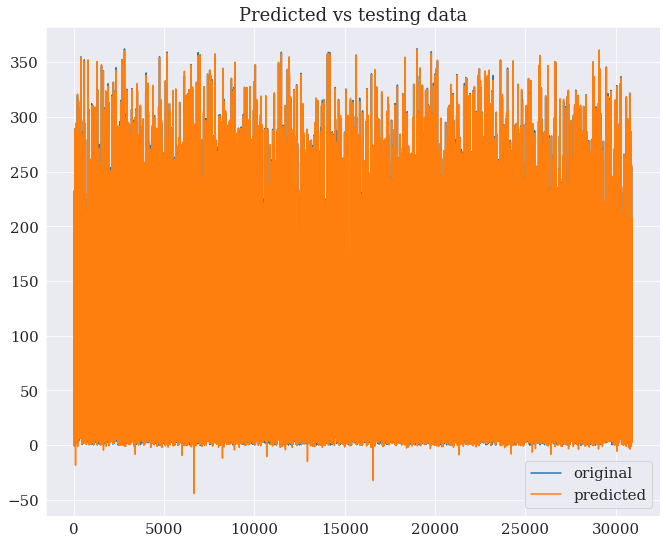

Actual vs Predicted values: Residual Plots


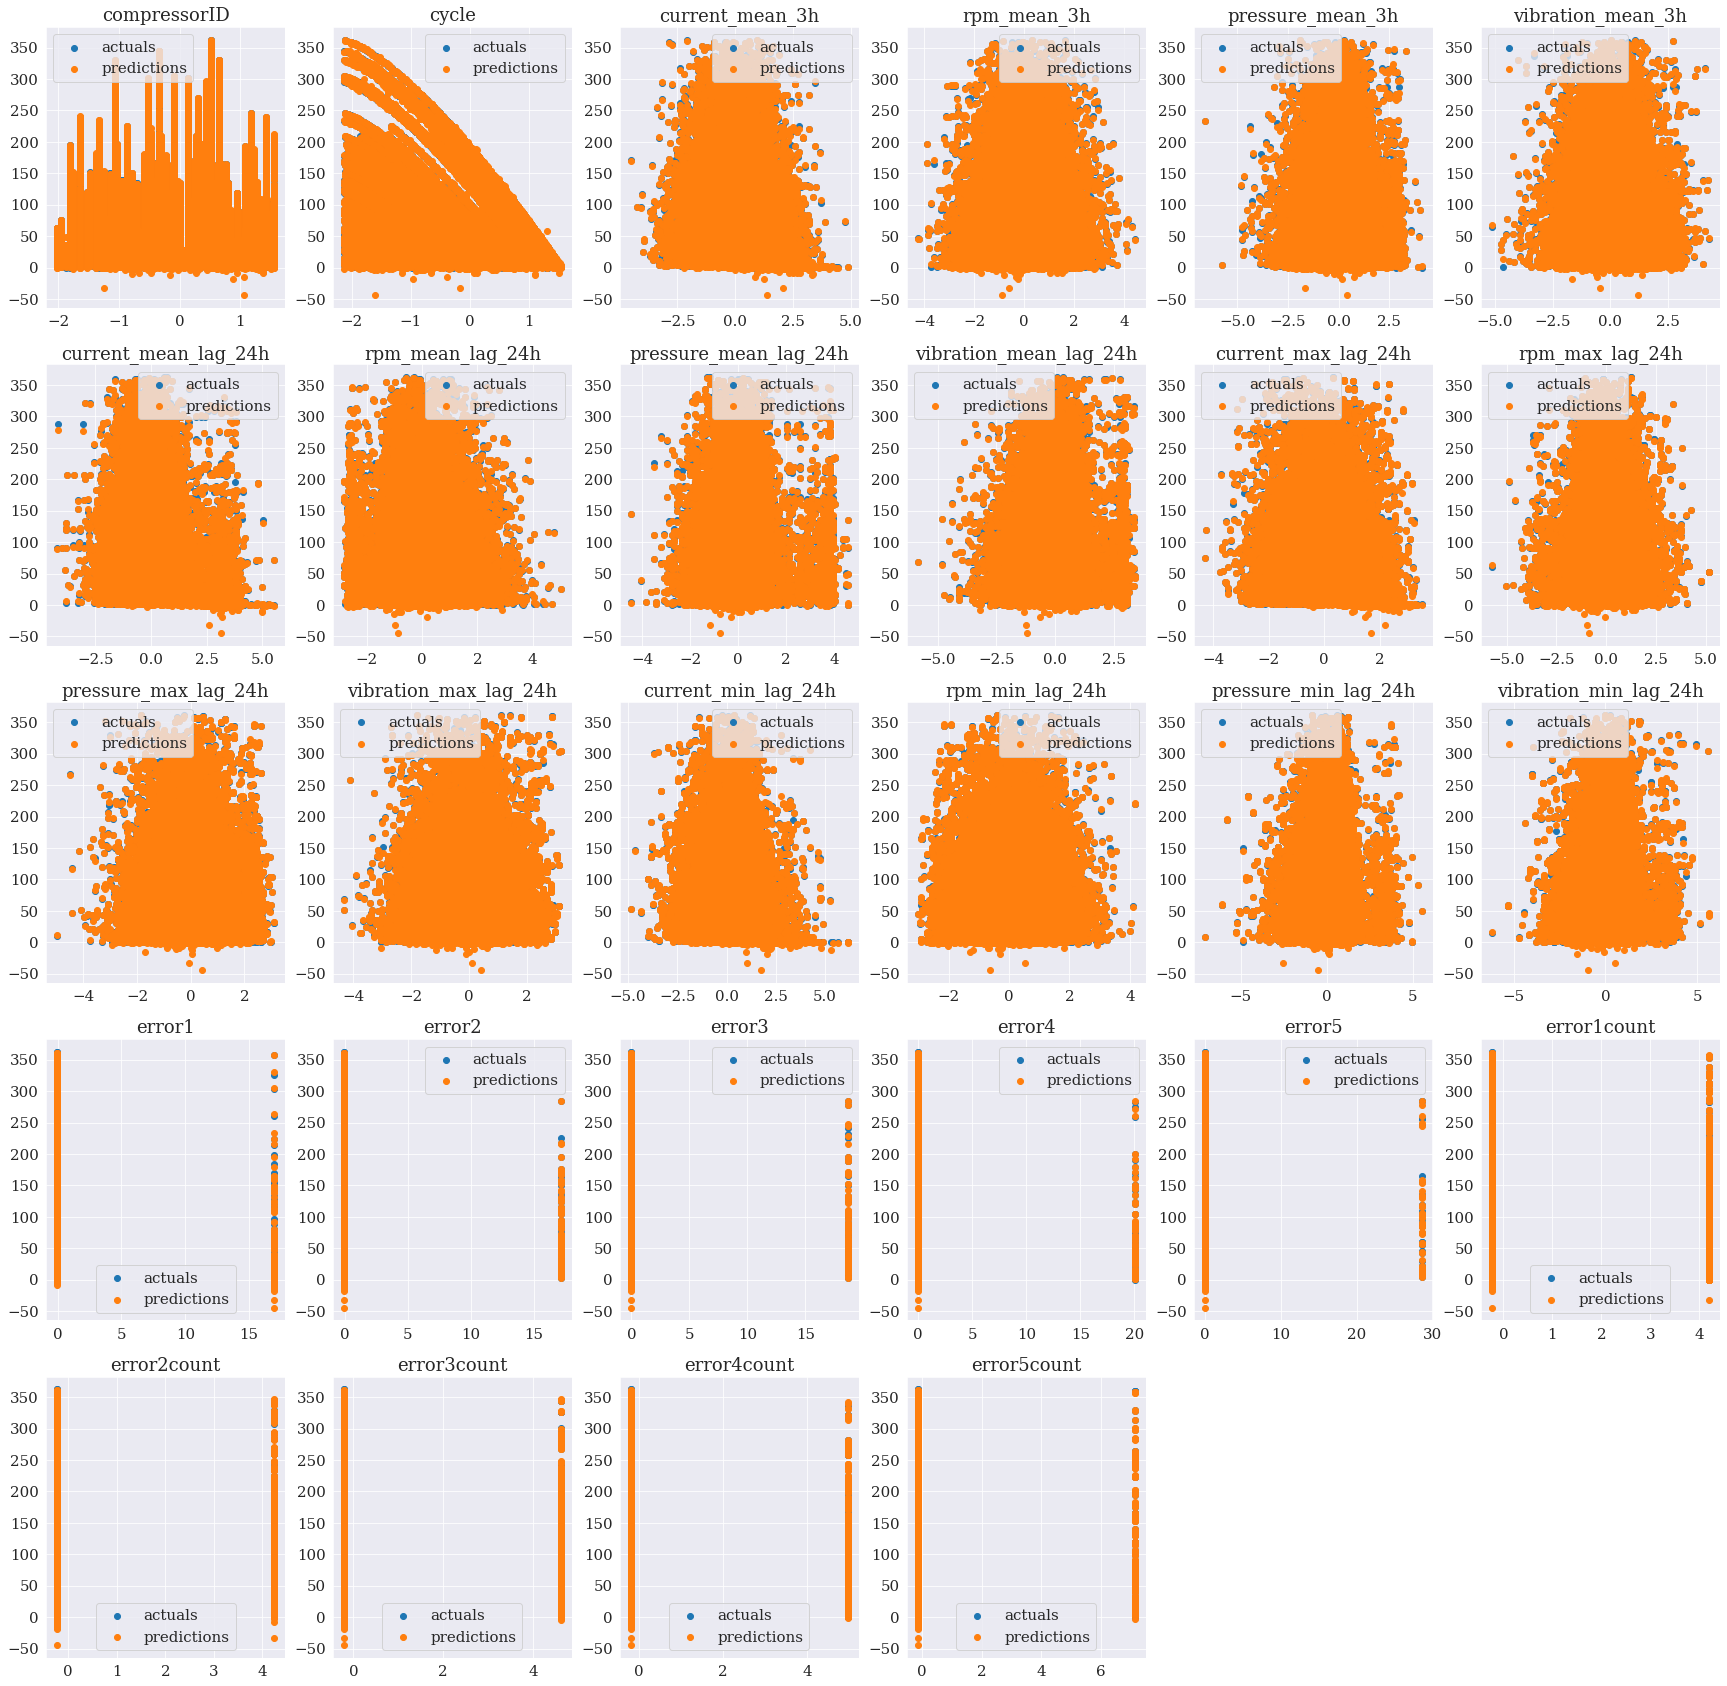

Actual vs Predicted values: Residual Plots


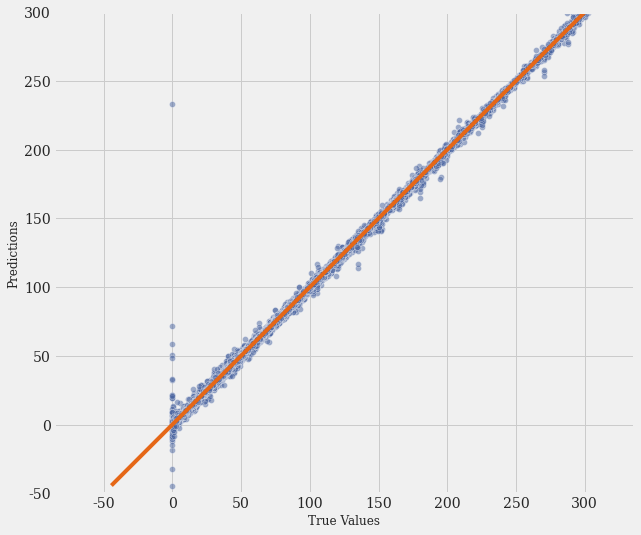

Training completed for rul_comp2
The CB model was trained in: 43.79 sec
Min value predicted: -58.64
  Max value predicted: 341.92
y_hat shape: (39637,)


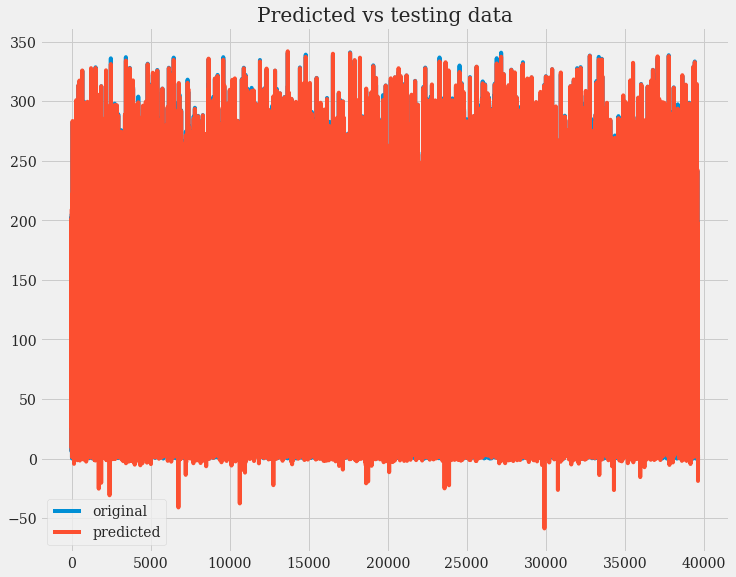

Actual vs Predicted values: Residual Plots


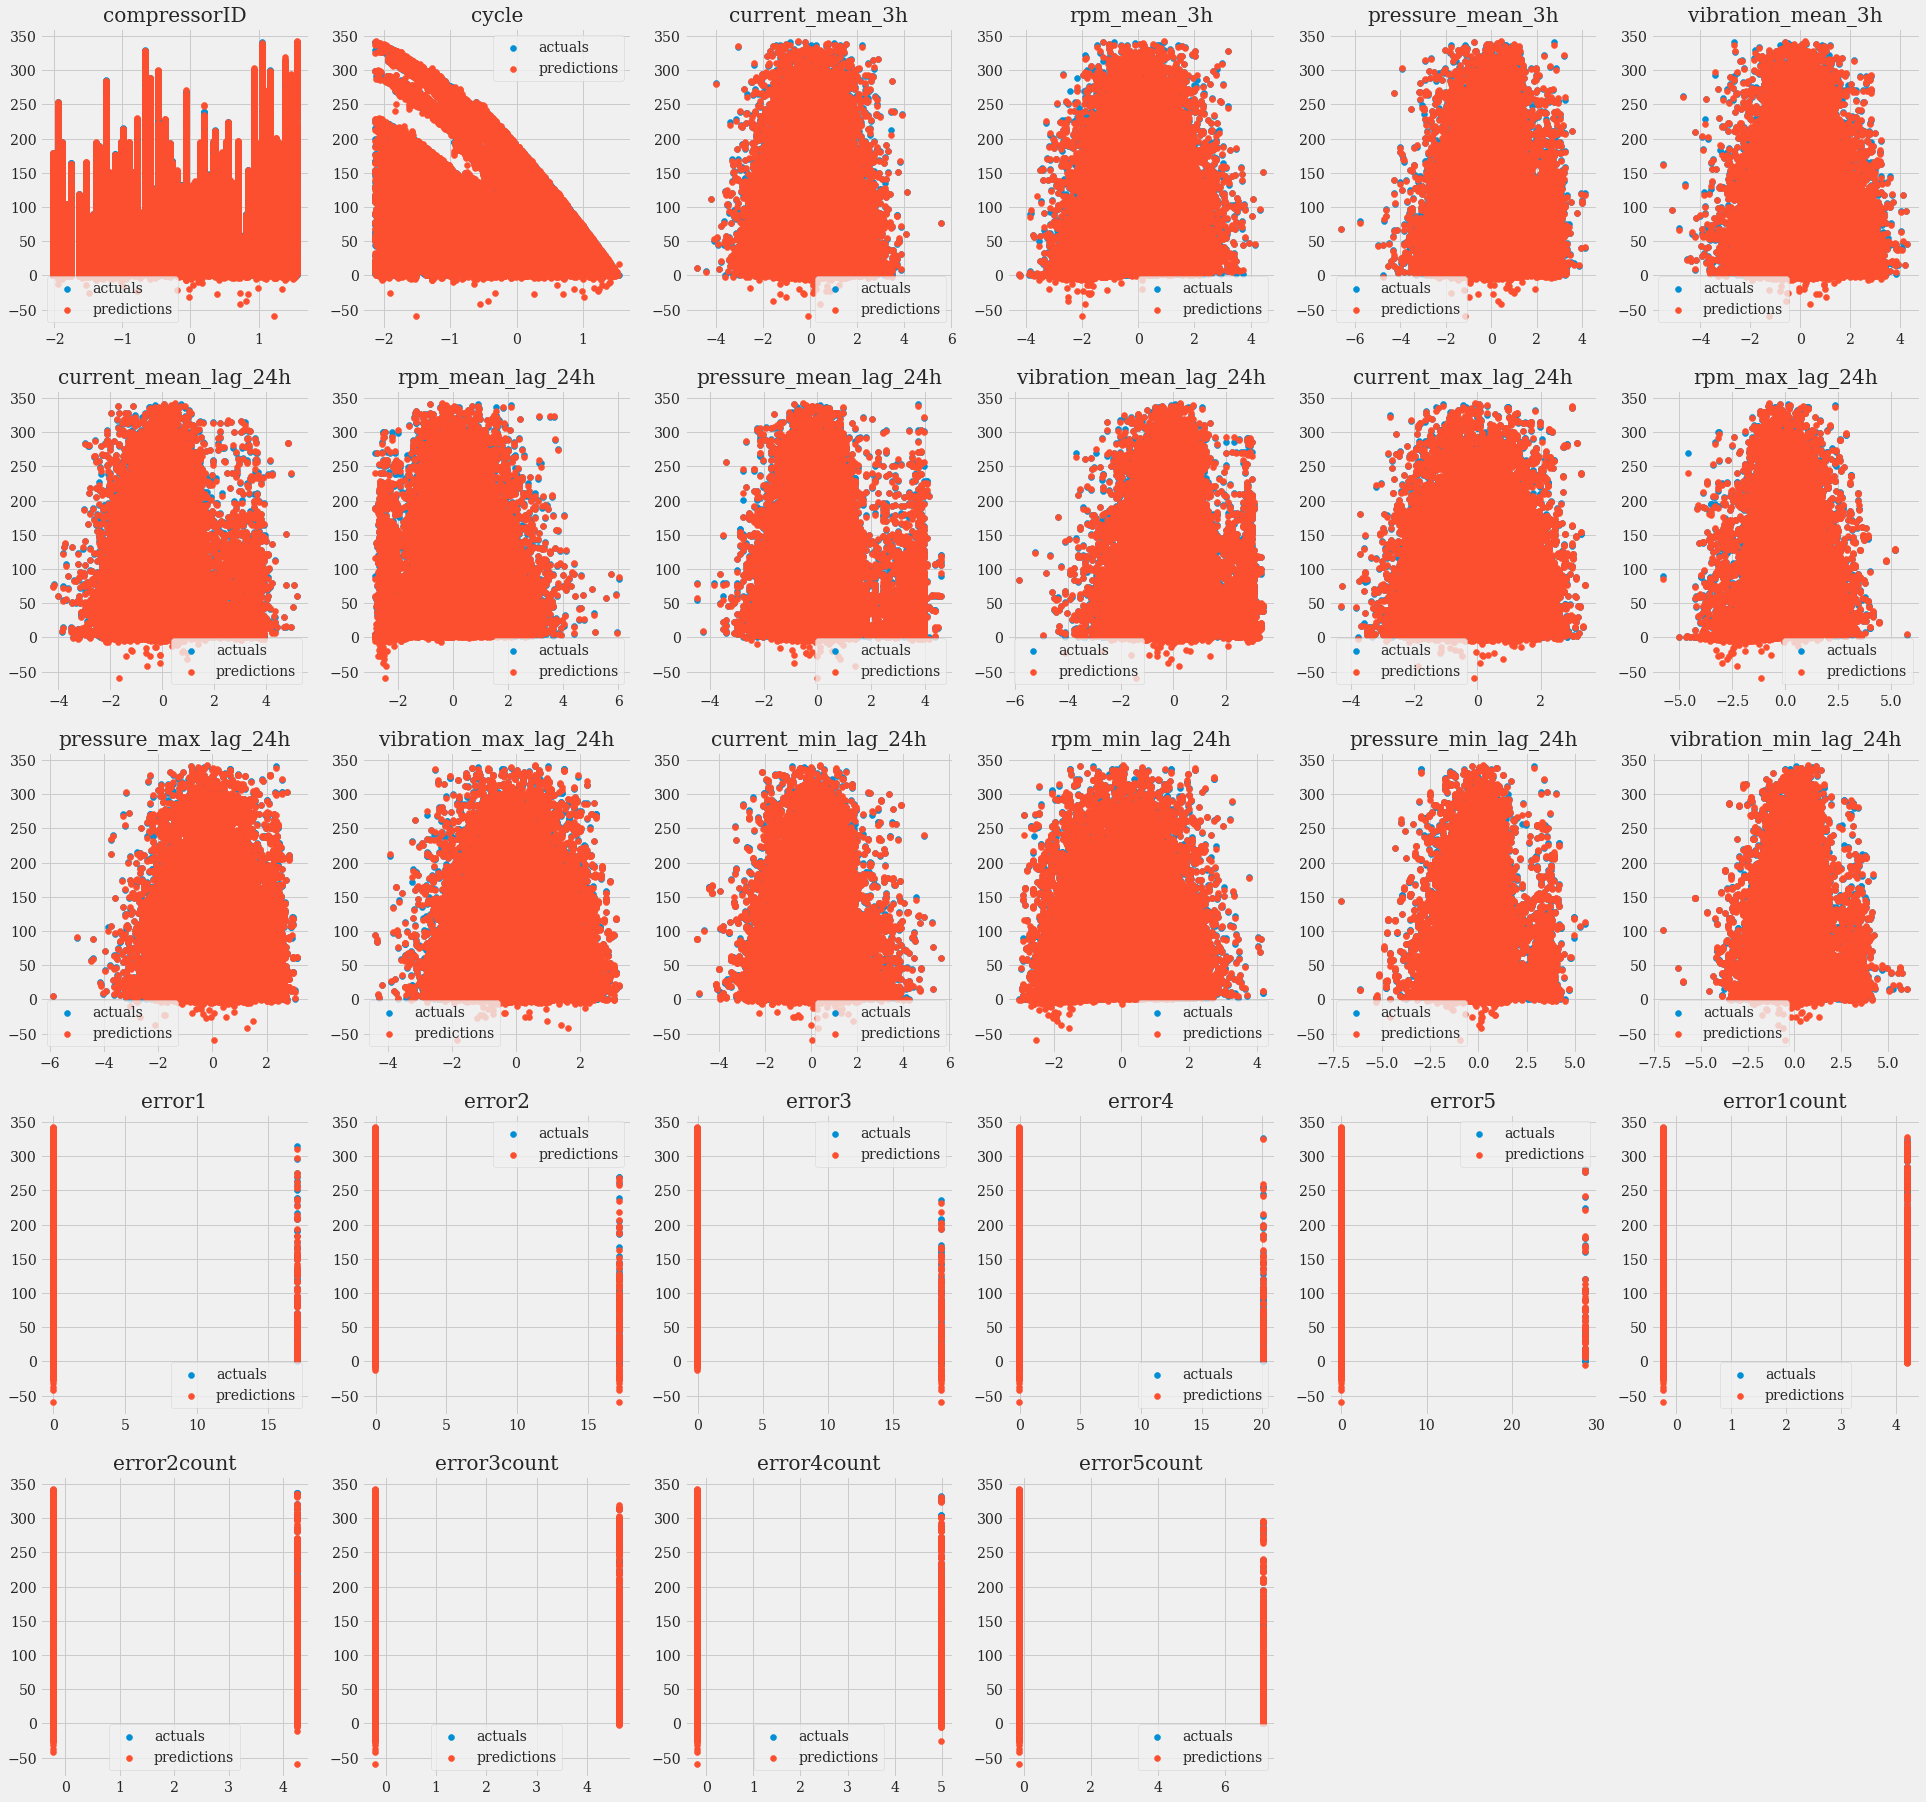

Actual vs Predicted values: Residual Plots


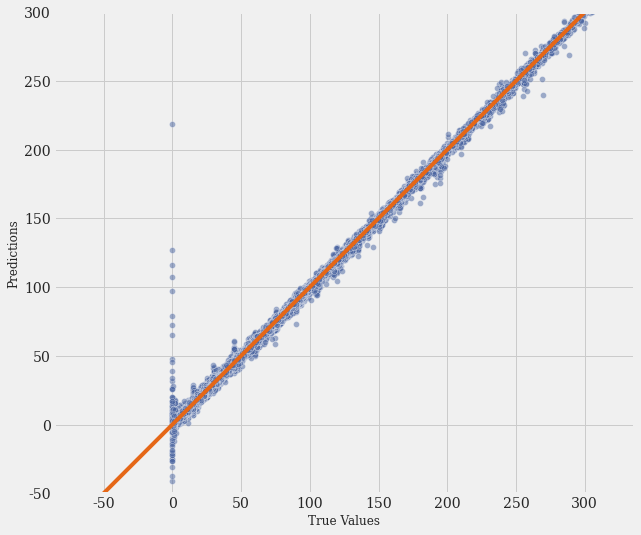

Training completed for rul_comp3
The CB model was trained in: 28.27 sec
Min value predicted: -26.37
  Max value predicted: 223.29
y_hat shape: (15704,)


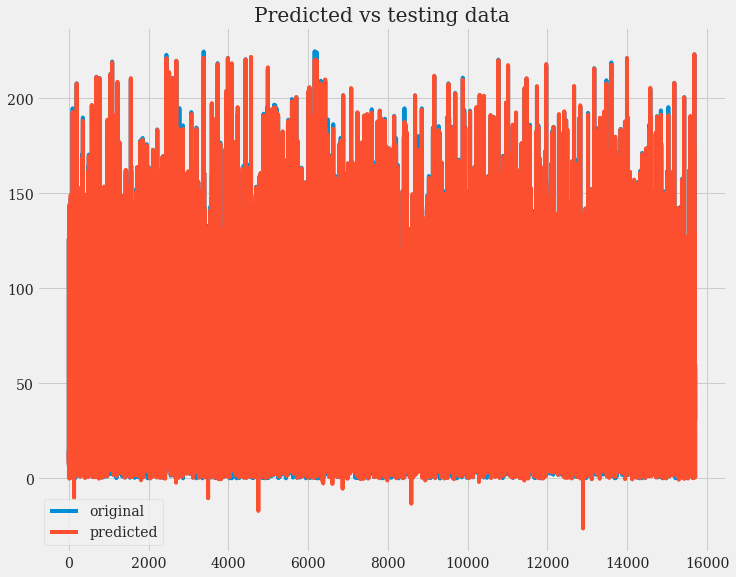

Actual vs Predicted values: Residual Plots


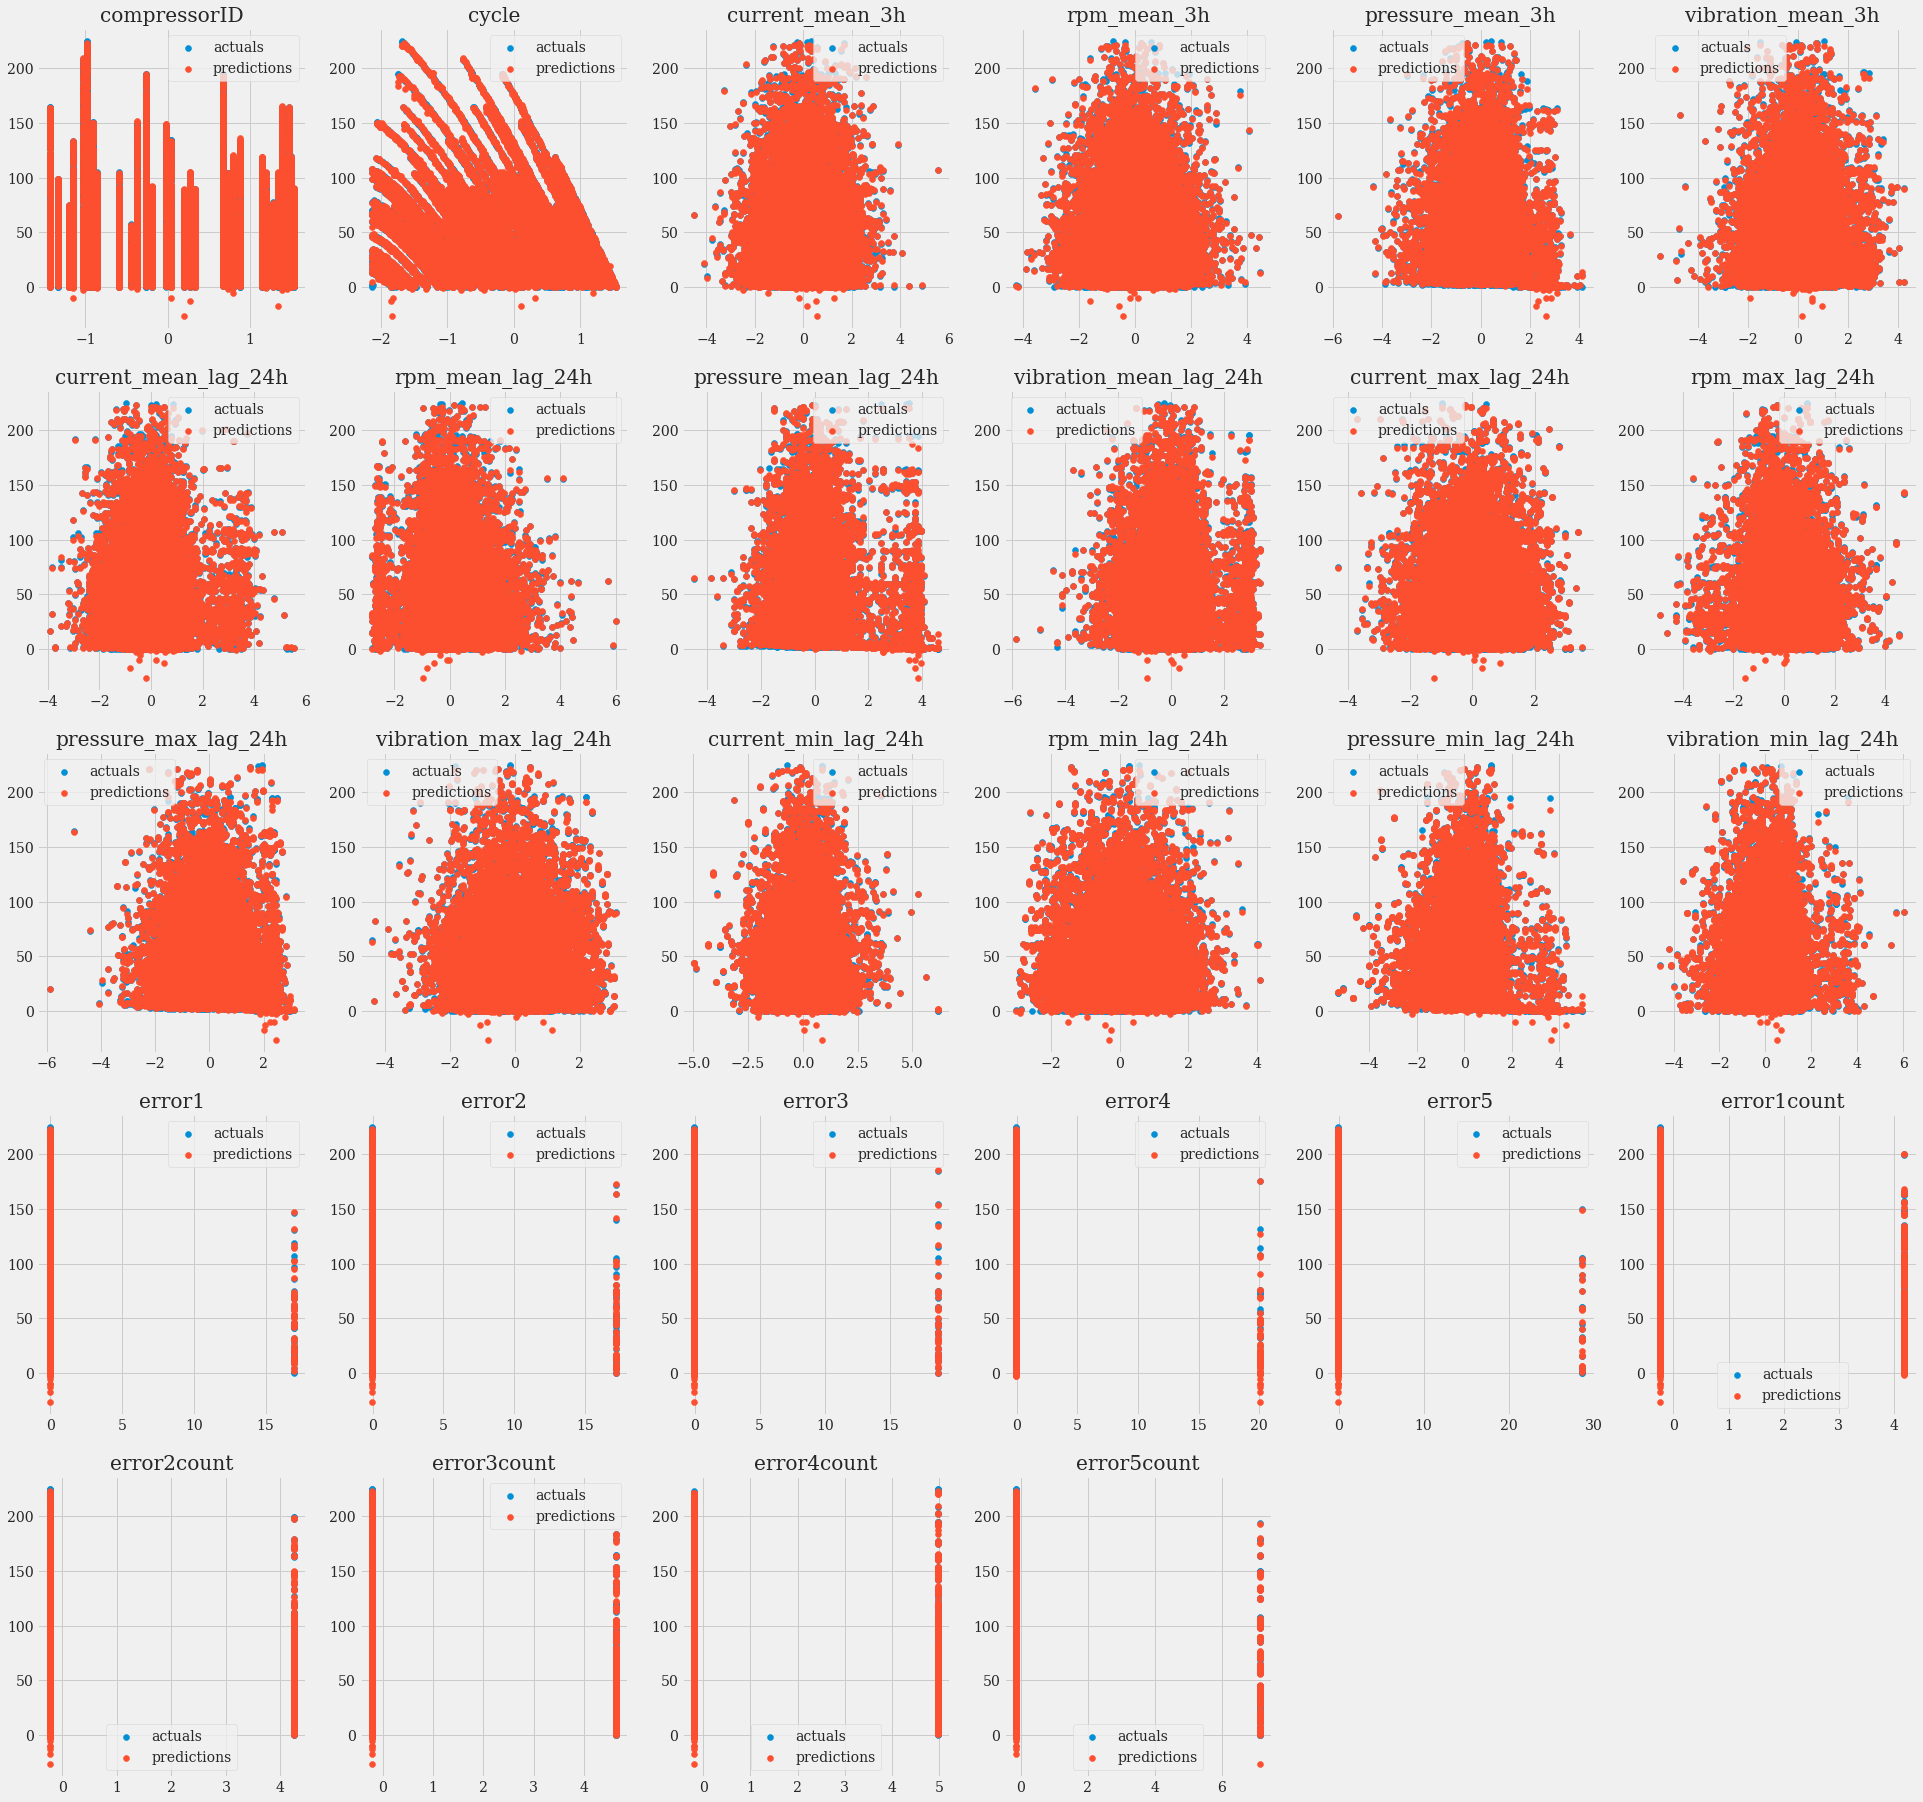

Actual vs Predicted values: Residual Plots


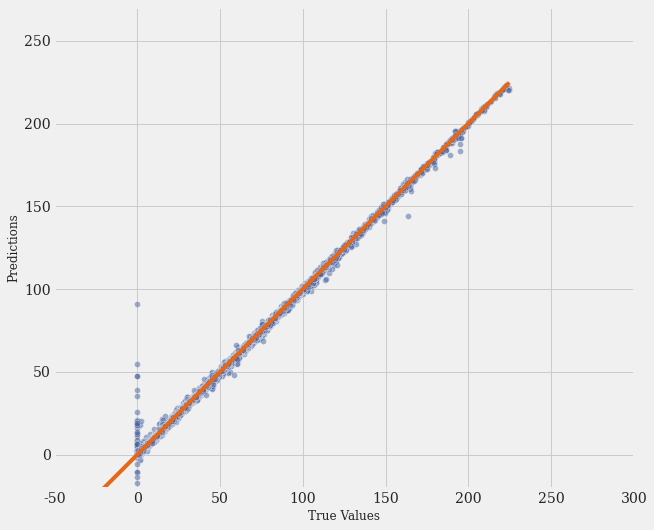

Training completed for rul_comp4
The CB model was trained in: 34.29 sec
Min value predicted: -45.94
  Max value predicted: 299.64
y_hat shape: (23347,)


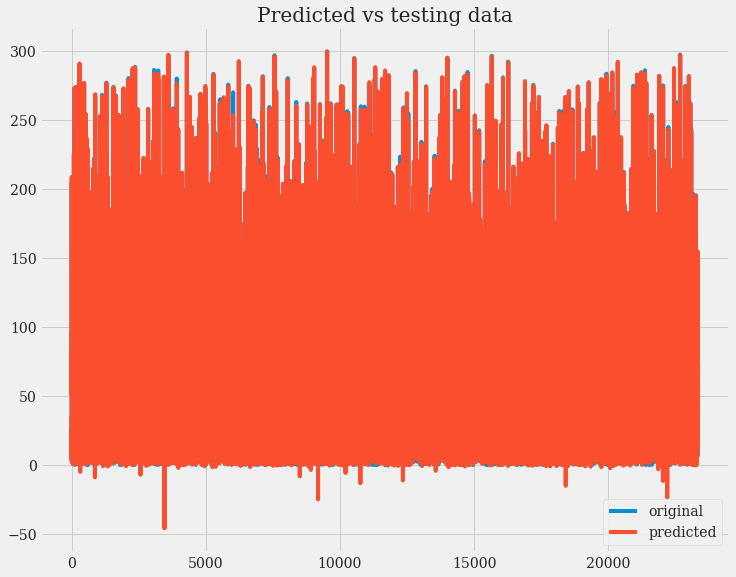

Actual vs Predicted values: Residual Plots


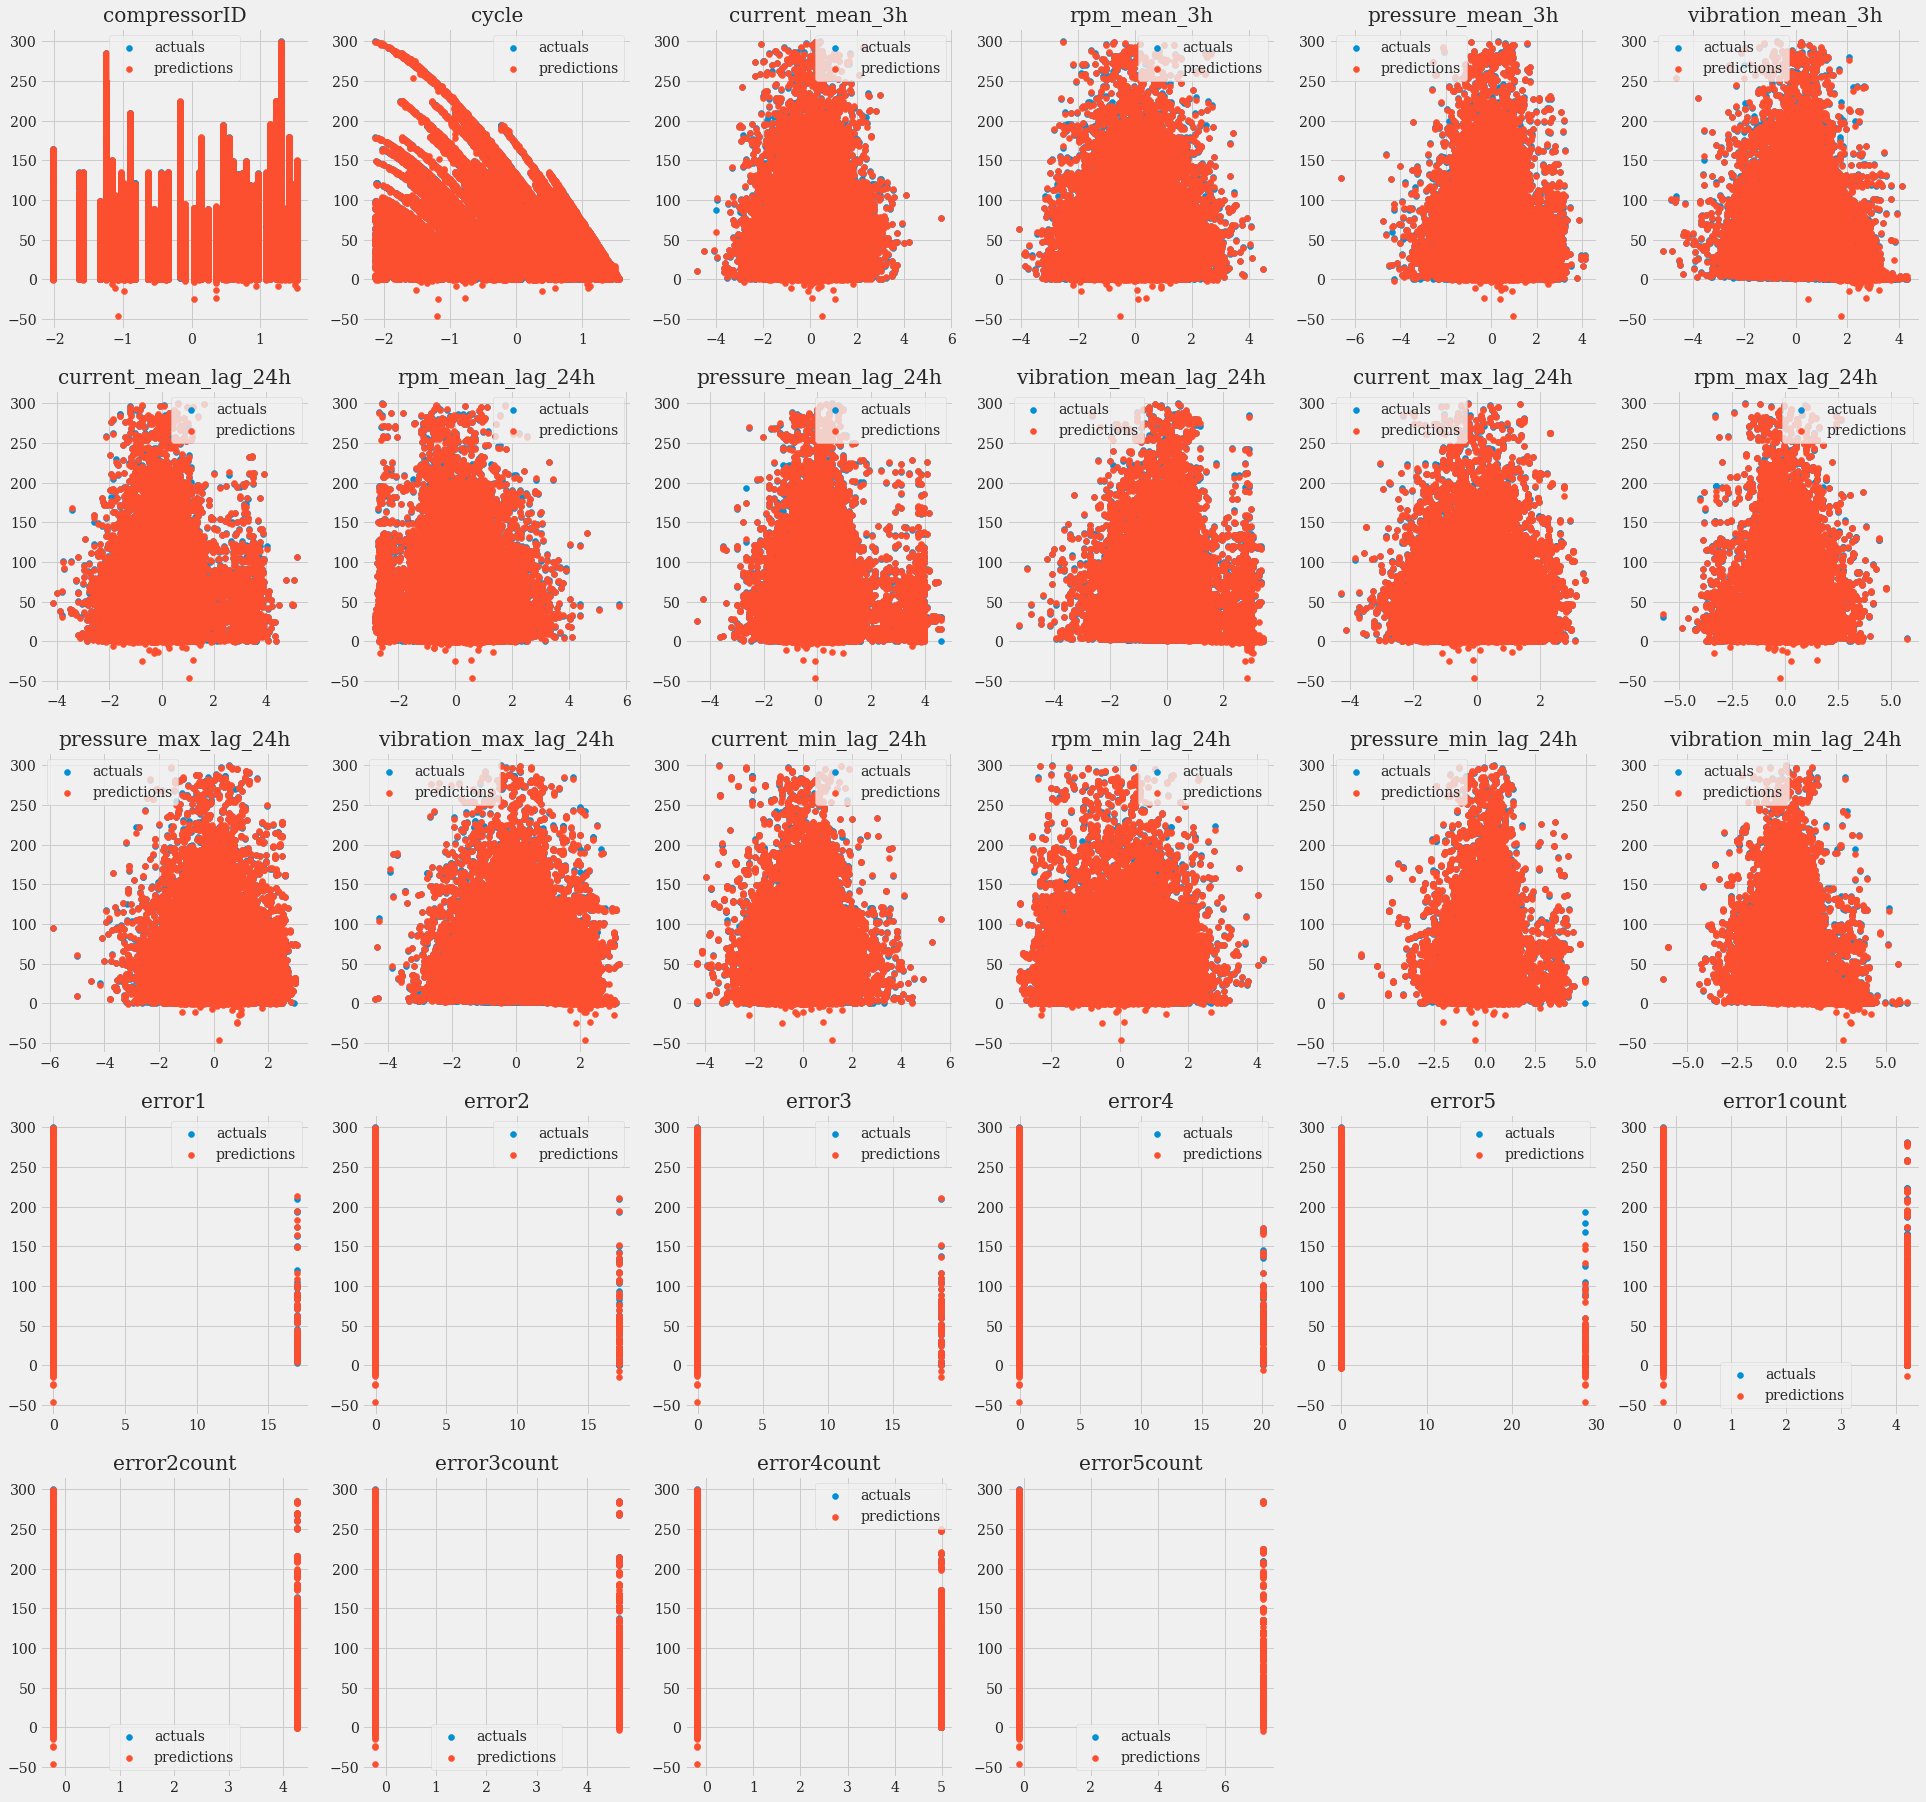

Actual vs Predicted values: Residual Plots


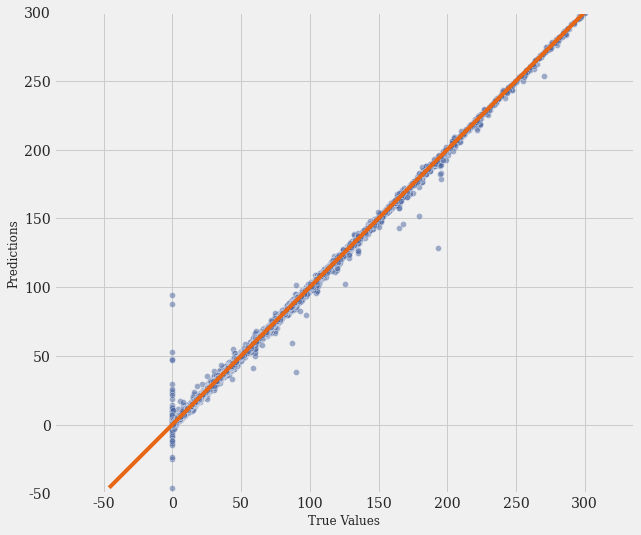

In [67]:
for rul_comp in y.columns:

  exec('y_temp_train = y_train_{}'.format(rul_comp))
  exec('X_temp_train = X_train_{}'.format(rul_comp))
  exec('y_temp_test = y_test_{}'.format(rul_comp))
  exec('X_temp_test = X_test_{}'.format(rul_comp))

  exec('cb_temp = cb_{}'.format(rul_comp))

  start_time = time()

  cb_temp.fit(X_temp_train, y_temp_train, early_stopping_rounds=10) # od_type="Iter", od_wait=10

  exec_time = time() - start_time

  print(f'Training completed for {rul_comp}')

  print('The CB model was trained in: {:.2f} sec'.format(exec_time))

  y_hat = cb_temp.predict(X_temp_test)

  print("Min value predicted: {:.2f}\n\
  Max value predicted: {:.2f}"\
        .format(np.min(y_hat), np.max(y_hat)))
  print("y_hat shape: {}".format(y_hat.shape))

  f, x_ax = plt.subplots(figsize=(11, 9))
  x_ax = range(len(y_temp_test))
  plt.plot(x_ax, y_temp_test, label="original")
  plt.plot(x_ax, y_hat, label="predicted")
  plt.title("Predicted vs testing data")
  plt.legend()
  plt.show()

  fig = plt.figure(figsize=(30,30))

  #Actual vs Predicted values: Residual Plots
  print('Actual vs Predicted values: Residual Plots')

  columns = X_temp_test.columns

  for c, num in zip(columns, range(0,28)):
      ax = fig.add_subplot(5, 6, num+1)
      ax.scatter(X_temp_test[c], y_temp_test)
      ax.scatter(X_temp_test[c], y_hat)
      ax.set_title(c)
      ax.legend(['actuals', 'predictions'])
      
  #plt.savefig('fig/12_columns_pred_cb.png')
  plt.show()

  #Correlation between True values
  print('Actual vs Predicted values: Residual Plots')


  plt.style.use("fivethirtyeight")
  plt.figure(figsize=(9.25, 8.25))

  sns.scatterplot(x=y_temp_test, y=y_hat, color='#4863A0', alpha=0.5)

  p1 = max(max(y_hat), max(y_temp_test))
  p2 = min(min(y_hat), min(y_temp_test))
  sns.lineplot(x=[p1, p2], y=[p1, p2], color='#E56717')

  plt.xlabel('True Values', fontsize=12)
  plt.ylabel('Predictions', fontsize=12)
  plt.axis('equal')
  plt.xlim(xmin=-50, xmax=300)
  plt.ylim(ymin=-50, ymax=300)

  plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
  plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

  #plt.savefig('fig/12_model_pred_cb.png', bbox_inches='tight')
  plt.show()

It is visible that the values are correctly predicted, especially for cheaper cars. This is due to the fact that the dataset has less samples of luxury second-hand cars. Now, we will have a look at the predictions of the whole model to see how they are adapted to actual values.

From the above scatter plot of Actual vs Predicted values, it is possible to take the following conclusions:

The closer the scatter points are to the regression line, the better the model. The $R²\ score$ obtained was of 0.9457, which is a high score. This results in all the points being close to the diagonal line. The lower the $R²\ score$, the weaker the goodness of fit of the model.
Having a deeper look into the values, we can conclude that the higher the price of the car, the more dispersed is the model. This affirmation was already visible when analysing the prediction of each feature. The number of second-hand cars with a value higher than 50,000 € are scarce compared to more accessible cars. Therefore, we could expect a better performance of the model when predicting prices of non-luxury cars.
Residual values are those separated from the regression line. If they are above the line, they are positive, whereas if they are below, they are negative. Residuals seem to be balanced for lower prices, nevertheless negative values seem to be predominant with higher prices. Thereupon, there can be underestimations on predicting cars with a higher market value.
In any case, the performance of our model will be more than acceptable since the points are fit to the regression line and the $R²\ score$ value is close to 0.95.


# Shap Figures


The Shapley value consists on this theory:

A coalition of players cooperates, and obtain a final overall gain for the cooperation. Some players will contribute more to the coalition than other or even a different bargaining power (they could threat to destroy the total surplus). Therefore, the Shapley values answer these questions: how important is each player to the overall cooperation, and what payoff can they reasonably expect?

In order to visualize which features have a greater impact to the model, we can plot the SHAP (SHapley Additive exPlnations) values for every feature and every sample. Features are sorted by the sum of SHAP value magnitudes over all samples, and SHAP plot shows the distribution of the impacts each feature has on the model output.

The color represents feature values (red is high, blue is low). This explains for example that a low manufactured year, lowers the final predicted car price. What is more, cars with a high horse power, will result on a higher prection. Finally, the higher the total number of kilometers of the car, the lower the price.

In [ ]:
!pip install shap

     |████████████████████████████████| 564 kB 4.2 MB/s 


In [ ]:
import shap
shap.initjs()

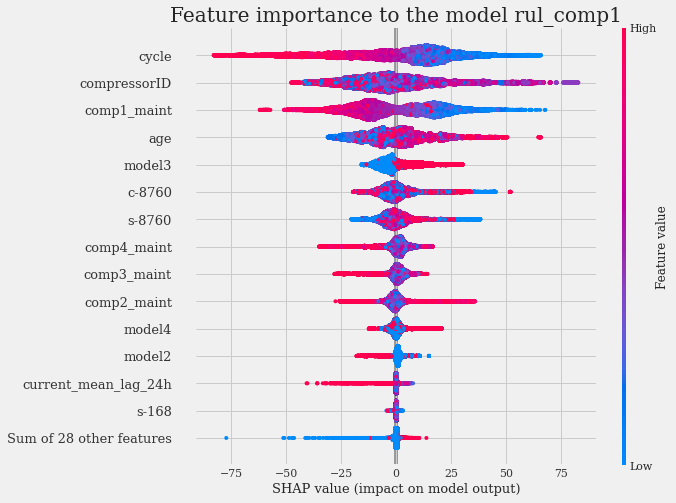

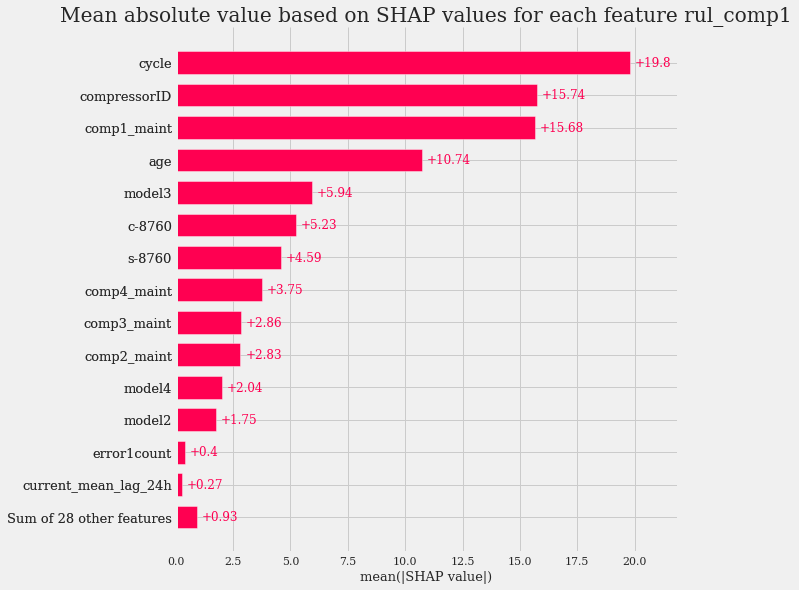

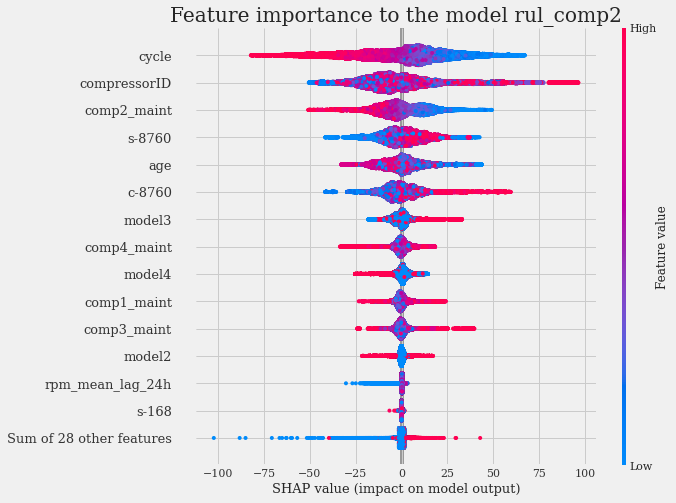

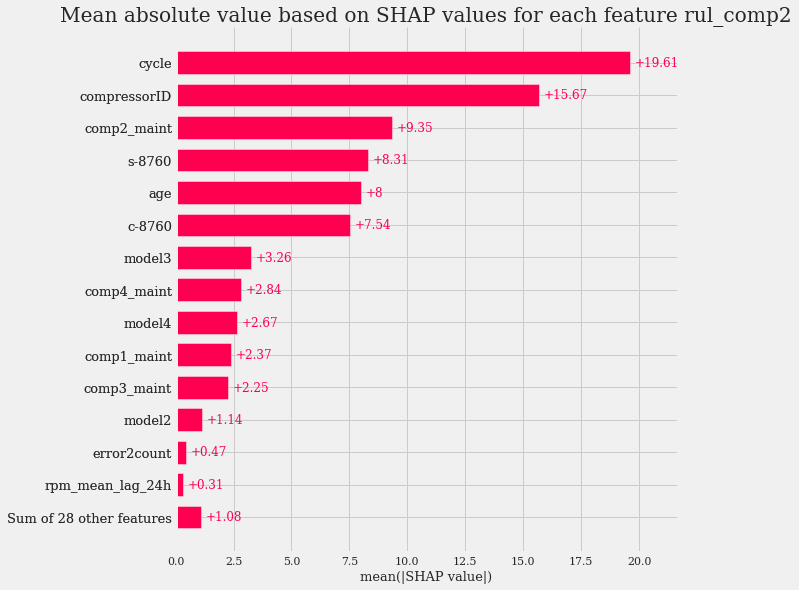

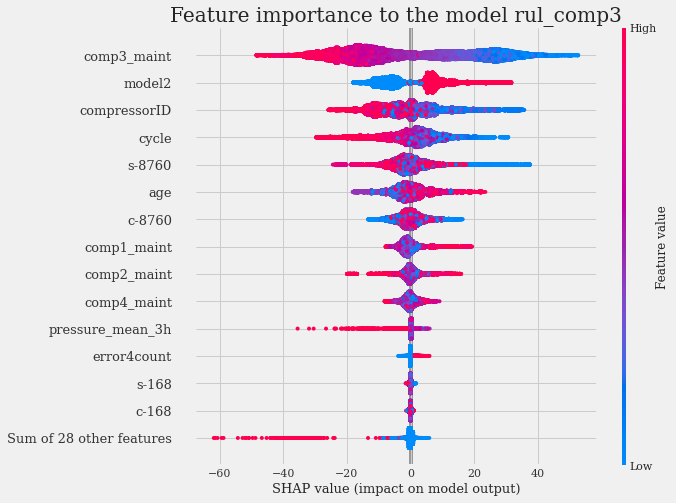

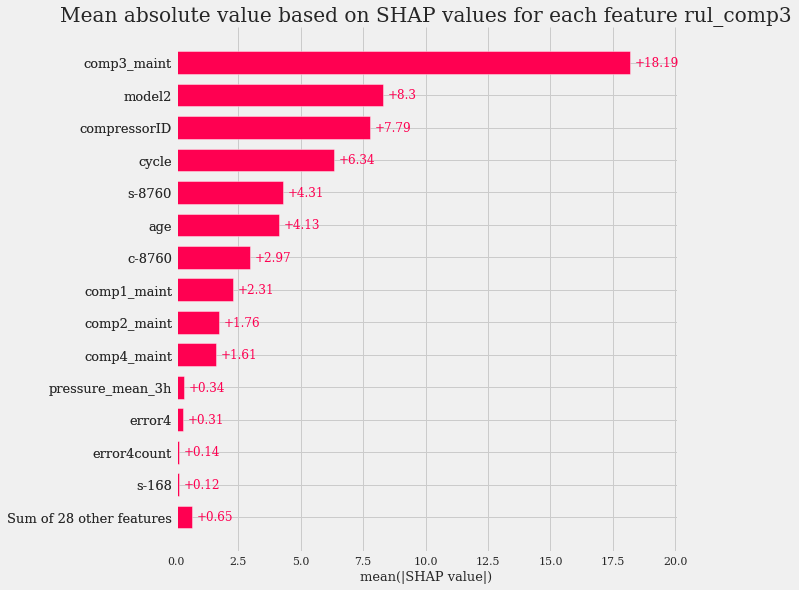

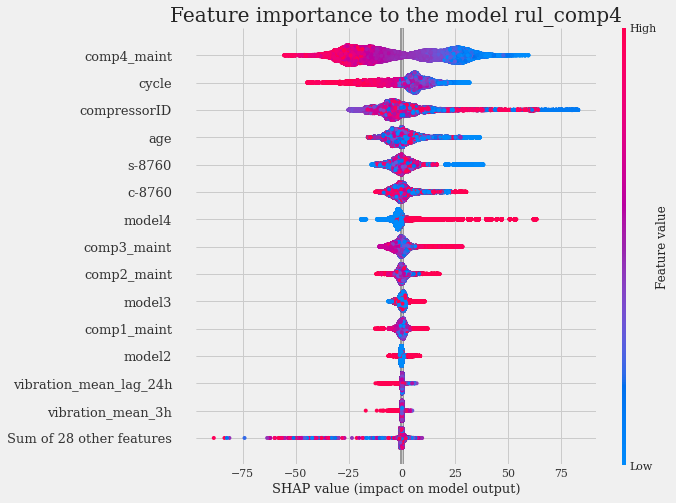

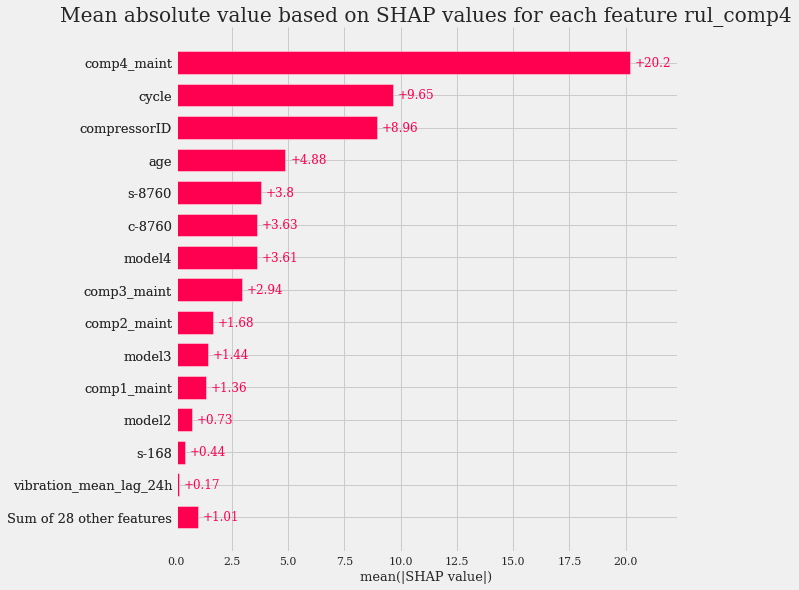

In [ ]:
for rul_comp in y.columns:

  exec('X_temp = X_{}'.format(rul_comp))
  exec('cb_temp = cb_{}'.format(rul_comp))

  explainer = shap.Explainer(cb_temp)
  shap_values = explainer(X_temp)


  plt.title(f'Feature importance to the model {rul_comp}')
  shap.plots.beeswarm(shap_values, max_display=15, show=False)
  #plt.savefig('fig/12_shap_model_distribution.png', bbox_inches='tight')
  plt.show()
  plt.title(f'Mean absolute value based on SHAP values for each feature {rul_comp}')
  shap.plots.bar(shap_values, max_display=15, show=False)
  #plt.savefig('fig/12_shap_model_barplot.png', bbox_inches='tight')
  plt.show()

# Model persistence


## Create one different model for each component!

In [71]:
from pathlib import Path
import os

Defining the model to be saved. The fit will be based on the entire dataset to enrich the model, no separations into train & test sets. This process is based on the explanation of compressed pickles commented in this article.

In [72]:
for rul_comp in y.columns:

  exec('y_temp = y_{}'.format(rul_comp))
  exec('X_temp = X_{}'.format(rul_comp))

  exec('cb_temp = cb_{}'.format(rul_comp))


  cb_temp.fit(X_temp, y_temp, early_stopping_rounds=10)
  cb_temp.save_model(f"cb_model_{rul_comp}.model")


# Real case

In [68]:
random_num=1000

In [69]:
for rul_comp in y.columns:
  
  exec('y_temp_test = y_test_{}'.format(rul_comp))
  exec('X_temp_test = X_test_{}'.format(rul_comp))
  exec('cb_temp = cb_{}'.format(rul_comp))


  test_values = X_temp_test.iloc[random_num].values

  single_test = pd.DataFrame([test_values], columns=X_temp_test.columns, index=[0])
  print(single_test)

  y_hat = cb_temp.predict(single_test)
  print(f'Predicted value: {y_hat}')
  print(f'Real value: {y_temp_test.iloc[random_num]}')
  


   compressorID     cycle  current_mean_3h  rpm_mean_3h  pressure_mean_3h  \
0      1.559439 -1.755423        -0.682257     0.468782         -0.218417   

   vibration_mean_3h  current_mean_lag_24h  rpm_mean_lag_24h  \
0          -0.028713              0.889504           -0.1959   

   pressure_mean_lag_24h  vibration_mean_lag_24h  ...   model2    model3  \
0              -0.747258               -0.697658  ... -0.45257 -0.733799   

     model4       age      s-24      c-24     s-168     c-168    s-8760  \
0  1.457738 -1.081237  1.000506  0.999014 -0.753313 -1.197901  0.433723   

     c-8760  
0  1.349464  

[1 rows x 42 columns]
Predicted value: [22.67660159]
Real value: 23.75
   compressorID     cycle  current_mean_3h  rpm_mean_3h  pressure_mean_3h  \
0     -0.127507 -0.213347        -0.433528     -1.41746         -1.577108   

   vibration_mean_3h  current_mean_lag_24h  rpm_mean_lag_24h  \
0           0.147862              0.395335         -1.009177   

   pressure_mean_lag_24h  vi

In [ ]:
random_num=1000

In [ ]:
for rul_comp in y.columns:
  
  exec('y_temp_test = y_test_{}'.format(rul_comp))
  exec('X_temp_test = X_test_{}'.format(rul_comp))
  exec('cb_temp = cb_{}'.format(rul_comp))


  test_values = X_temp_test.iloc[random_num].values

  single_test = pd.DataFrame([test_values], columns=X_temp_test.columns, index=[0])
  print(single_test)

  y_hat = cb_temp.predict(single_test)
  print(f'Predicted value: {y_hat}')
  print(f'Real value: {y_temp_test.iloc[random_num]}')
  


   compressorID     cycle  current_mean_3h  ...     c-168    s-8760    c-8760
0      1.559439 -1.755423        -0.682257  ...  0.707269  0.229774  1.392051

[1 rows x 42 columns]
Predicted value: [25.57375295]
Real value: 23.75
   compressorID     cycle  current_mean_3h  ...     c-168    s-8760    c-8760
0     -0.127507 -0.213347        -0.433528  ... -0.052669  0.208725 -1.399848

[1 rows x 42 columns]
Predicted value: [58.42513837]
Real value: 59.625
   compressorID     cycle  current_mean_3h  ...     c-168    s-8760    c-8760
0     -1.156081 -0.056822         0.498745  ...  1.168572  0.100875 -1.412898

[1 rows x 42 columns]
Predicted value: [133.47774689]
Real value: 133.875
   compressorID     cycle  current_mean_3h  ...    c-168    s-8760    c-8760
0      1.504712 -0.842079        -0.281223  ... -0.46689  0.632887 -1.262092

[1 rows x 42 columns]
Predicted value: [31.39278413]
Real value: 31.375


# Print csv

In [ ]:
X

compressorID     cycle  current_mean_3h  ...     c-168    s-8760    c-8760
0          -2.026580 -2.139543         0.994142  ...  0.999409  0.021334  1.417488
1          -2.026580 -2.134816         0.623977  ...  0.881034  0.024373  1.417439
2          -2.026580 -2.130222        -1.113057  ...  0.751573  0.027413  1.417383
3          -2.026580 -2.125747         0.016767  ...  0.612657  0.030452  1.417321
4          -2.026580 -2.121377        -0.778128  ...  0.466039  0.033491  1.417253
...              ...       ...              ...  ...       ...       ...       ...
291395      1.559439  1.556162        -0.460511  ...  1.273899 -0.012105  1.417596
291396      1.559439  1.557082        -1.358812  ...  1.197088 -0.009065  1.417619
291397      1.559439  1.558001        -0.000821  ...  1.105205 -0.006025  1.417635
291398      1.559439  1.558920         1.222040  ...  0.999409 -0.002985  1.417645
291399      1.559439  1.559839         0.108053  ...  0.881034  0.000055  1.417648

[291400 rows x 42 columns]

In [ ]:
X[(X['compressorID']==12) & (X['cycle']==1958)]

compressorID  cycle  current_mean_3h  ...     c-168    s-8760    c-8760
34088            12   1958       186.217097  ...  0.943883 -0.876928 -0.480622

[1 rows x 42 columns]

In [ ]:
X[X['compressorID']==1]

Empty DataFrame
Columns: [compressorID, cycle, current_mean_3h, rpm_mean_3h, pressure_mean_3h, vibration_mean_3h, current_mean_lag_24h, rpm_mean_lag_24h, pressure_mean_lag_24h, vibration_mean_lag_24h, current_max_lag_24h, rpm_max_lag_24h, pressure_max_lag_24h, vibration_max_lag_24h, current_min_lag_24h, rpm_min_lag_24h, pressure_min_lag_24h, vibration_min_lag_24h, error1, error2, error3, error4, error5, error1count, error2count, error3count, error4count, error5count, comp1_maint, comp2_maint, comp3_maint, comp4_maint, model2, model3, model4, age, s-24, c-24, s-168, c-168, s-8760, c-8760]
Index: []

In [ ]:
X.iloc[34004]

compressorID             -1.385500e+00
cycle                     6.259422e-01
current_mean_3h           1.563721e+00
rpm_mean_3h               6.845606e-01
pressure_mean_3h          9.169717e-02
vibration_mean_3h         1.288317e-01
current_mean_lag_24h      3.302913e-15
rpm_mean_lag_24h         -5.394346e-01
pressure_mean_lag_24h    -4.163336e-16
vibration_mean_lag_24h   -1.387779e-17
current_max_lag_24h       4.123923e-13
rpm_max_lag_24h          -9.467725e-01
pressure_max_lag_24h     -2.803313e-15
vibration_max_lag_24h    -1.191584e+00
current_min_lag_24h       1.148148e+00
rpm_min_lag_24h           1.980160e-02
pressure_min_lag_24h     -6.843784e-01
vibration_min_lag_24h    -8.089352e-01
error1                   -5.894595e-02
error2                   -5.820862e-02
error3                   -5.347809e-02
error4                   -4.983822e-02
error5                   -3.492481e-02
error1count              -2.381834e-01
error2count              -2.356711e-01
error3count              

In [ ]:
X.iloc[34088]

compressorID             -1.385500e+00
cycle                     7.119554e-01
current_mean_3h          -7.490622e-01
rpm_mean_3h               1.112153e+00
pressure_mean_3h          3.693611e-01
vibration_mean_3h         1.455751e+00
current_mean_lag_24h     -5.551115e-17
rpm_mean_lag_24h          2.326161e+00
pressure_mean_lag_24h    -2.498002e-16
vibration_mean_lag_24h   -1.110223e-16
current_max_lag_24h      -3.098632e-13
rpm_max_lag_24h           2.116347e+00
pressure_max_lag_24h      2.081668e-15
vibration_max_lag_24h     3.207298e-01
current_min_lag_24h       1.211601e-01
rpm_min_lag_24h           1.980639e+00
pressure_min_lag_24h      9.051623e-01
vibration_min_lag_24h     2.719079e-01
error1                   -5.894595e-02
error2                   -5.820862e-02
error3                   -5.347809e-02
error4                   -4.983822e-02
error5                   -3.492481e-02
error1count              -2.381834e-01
error2count              -2.356711e-01
error3count              

In [70]:
for rul_comp in y.columns:
  
  exec('cb_temp = cb_{}'.format(rul_comp))

  test_values = X.iloc[34004].values

  single_test = pd.DataFrame([test_values], columns=X.columns, index=[0])
  print(single_test)

  y_hat = cb_temp.predict(single_test)
  print(f'Predicted value: {y_hat}')
  print(f'Real value: {y.iloc[34004][rul_comp]}')

   compressorID     cycle  current_mean_3h  rpm_mean_3h  pressure_mean_3h  \
0       -1.3855  0.625942         1.563721     0.684561          0.091697   

   vibration_mean_3h  current_mean_lag_24h  rpm_mean_lag_24h  \
0           0.128832              2.940305         -0.539435   

   pressure_mean_lag_24h  vibration_mean_lag_24h  ...   model2   model3  \
0              -1.601268               -0.069766  ... -0.45257  1.36277   

     model4       age      s-24      c-24     s-168    c-168    s-8760  \
0 -0.685994 -0.385421 -0.999837 -1.000643 -0.468197  1.33467 -1.238884   

    c-8760  
0 -0.67699  

[1 rows x 42 columns]
Predicted value: [1.19235441]
Real value: 1.25
   compressorID     cycle  current_mean_3h  rpm_mean_3h  pressure_mean_3h  \
0       -1.3855  0.625942         1.563721     0.684561          0.091697   

   vibration_mean_3h  current_mean_lag_24h  rpm_mean_lag_24h  \
0           0.128832              2.940305         -0.539435   

   pressure_mean_lag_24h  vibration_

In [ ]:
for rul_comp in y.columns:
  
  exec('cb_temp = cb_{}'.format(rul_comp))

  test_values = X.iloc[34004].values

  single_test = pd.DataFrame([test_values], columns=X.columns, index=[0])
  print(single_test)

  y_hat = cb_temp.predict(single_test)
  print(f'Predicted value: {y_hat}')
  print(f'Real value: {y.iloc[34004][rul_comp]}')

   compressorID     cycle  current_mean_3h  ...     c-168    s-8760    c-8760
0       -1.3855  0.625942         1.563721  ...  1.168572 -0.902919  1.093661

[1 rows x 42 columns]
Predicted value: [0.48872611]
Real value: 1.25
   compressorID     cycle  current_mean_3h  ...     c-168    s-8760    c-8760
0       -1.3855  0.625942         1.563721  ...  1.168572 -0.902919  1.093661

[1 rows x 42 columns]
Predicted value: [32.7966845]
Real value: 31.25
   compressorID     cycle  current_mean_3h  ...     c-168    s-8760    c-8760
0       -1.3855  0.625942         1.563721  ...  1.168572 -0.902919  1.093661

[1 rows x 42 columns]
Predicted value: [7.34482134]
Real value: nan
   compressorID     cycle  current_mean_3h  ...     c-168    s-8760    c-8760
0       -1.3855  0.625942         1.563721  ...  1.168572 -0.902919  1.093661

[1 rows x 42 columns]
Predicted value: [42.5980491]
Real value: nan


In [ ]:
X[X['compressorID']==1]

compressorID  cycle  current_mean_3h  ...     c-168    s-8760    c-8760
7                1      8       180.133784  ...  0.965926  0.005021  0.999987
8                1      9       176.364293  ...  0.955573  0.005738  0.999984
9                1     10       160.384568  ...  0.943883  0.006455  0.999979
10               1     11       170.472461  ...  0.930874  0.007173  0.999974
11               1     12       163.263806  ...  0.916562  0.007890  0.999969
...            ...    ...              ...  ...       ...       ...       ...
2916             1   2917       173.823921  ... -0.623490  0.867456 -0.497513
2917             1   2918       159.011758  ... -0.652287  0.867099 -0.498135
2918             1   2919       161.803419  ... -0.680173  0.866742 -0.498757
2919             1   2920       177.076824  ... -0.707107  0.866384 -0.499379
2920             1   2921       191.873171  ... -0.733052  0.866025 -0.500000

[2914 rows x 42 columns]